Nombre de los participantes Proyecto

Juan José Naranjo Velásquez CC : 1039474689

Kenneth David Leonel Triana CC: 1192817456

[Problemática](https://www.elcolombiano.com/medellin/con-tos-y-gripa-viven-en-las-zonas-con-la-peor-calidad-del-aire-del-aburra-KB25241931)

Las estadísticas por enfermedades respiratorias en el Valle de Aburrá se incrementan en épocas en las que la calidad del aire se ve afectada por diversos factores, sin embargo, una forma de determinar estos aumentos en la capacidad de los hospitales por estas enfermedades puede realizarse por medio del monitoreo de los contaminantes en el aire y las condiciones climáticas del espacio territorial.


**Objetivo general**:

Identificar posibles escenarios en los que se aumenten las capacidades de atención a pacientes de las IPS por diagnósticos de enfermedades respiratorias respecto a las condiciones meteorológicas y ambientales del Valle del Aburrá, con el fin de generar pronósticos prescriptivos y de alertamiento para la preparación de estos establecimientos ante situaciones de alta demanda por malas condiciones climáticas.

**Objetivos específicos**:

Extraer y transformar datos crudos del portal de descargas SIATA y base de datos de RIPS desde años 2020 a 2024 para la generación de un dataset con granularidad de registros diarios.

Realizar una exploración de datos bajo análisis descriptivo univariado y bivariado para identificar el comportamiento de las variables de entrada y salida.

Implementar modelos de machine learning con la finalidad de generar el pronóstico de la capacidad de las IPS respecto a la calidad del aire y las variables climáticas del Valle de Aburrá.

Analizar la evaluación de los modelos generados bajo métricas estadísticas para la selección del modelo que se adapte con mayor precisión a los datos manejados.

Desplegar el modelo seleccionado en una herramienta visual para consulta.

# 3. Datos. Extracción, transformación y cargue de datos

En esta sección se describe la estructura y el contenido de los datos empleados en el presente estudio, así como el proceso de construcción de los conjuntos de datos específicos para entrenamiento y validación del modelo de machine learning. También se realiza un análisis descriptivo de las variables del dataset final, proporcionando una comprensión inicial de sus características y patrones.

## 3.1 Datos originales

### Importación de librerias de trabajo

In [1]:
# importar librerias necesarias para manipulación de datos
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from scipy import stats
import statsmodels.api as sm
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import joblib

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Los datos utilizados en el estudio se obtuvieron mediante el portal de descargas del Sistema de Alerta Temprana de Medellín y el Valle de Aburrá SIATA junto con información de ingresos en hospitales del RIPS Medellín, donde se seleccionaron datos meteorológicos, ambientales y médicos. Estos son suministrados mediante archivos CSV  (Comma-Separated Values) que facilitan la exploración, imputación y manipulación de ellos para generar nuevos datos categóricos y numéricos que nos permiten comprender el comportamiento de nuestros datos

**Extracción de datos desde archivos CSV para almacenamiento en dataframes**

In [2]:
#Extraer datos de calidad del aire en las estaciones  # 69 Caldas, 86 Aranjuez, 28 Itagui
def get_data (url):
    """
    Función utilizada para la obtención de datos en tipo DataFrame según las bases de datos de las carpetas almacenadas

    In[0]: dirección de datos
    Out[0]: DataFrame con los datos extraídos
    """
    return pd.read_csv(url)

# Datos de la calidad del aire tomados desde red SIATA de monitoreo de calidad del aire en Valle de Aburra para estaciones itagui, caldas, aranjuez, belen
cal_aire_ita = 'data/raw/datosSiata/28_itagui/estacion_data_calidadaire_28_20240301_20240331.csv'
cal_aire_cal = 'data/raw/datosSiata/69_Caldas/estacion_data_calidadaire_69_20240301_20240331.csv'
cal_aire_ara = 'data/raw/datosSiata/86_Aranjuez/estacion_data_calidadaire_86_20240301_20240331.csv'
cal_aire_bel =  'data/raw/datosSiata/83_Belen/estacion_data_calidadaire_83_20240101_20240131.csv'

# Uso de función para extracción de datos
cal_aire_ita = get_data(cal_aire_ita)
cal_aire_cal = get_data(cal_aire_cal)
cal_aire_ara = get_data(cal_aire_ara)
cal_aire_bel = get_data(cal_aire_bel)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion itagui 28
temp_ita='data/raw/datosSiata/28_itagui/Temperatura/estacion_data_temperatura_252__20240201_20240229.csv'
humedad_ita='data/raw/datosSiata/28_itagui/humedad/estacion_data_humedad_252__20240201_20240229.csv'
presion_ita='data/raw/datosSiata/28_itagui/presion/estacion_data_presion_252__20240201_20240229.csv'
precipitacion_ita='data/raw/datosSiata/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
vientos_ita='data/raw/datosSiata/28_itagui/vientos/estacion_data_vientos_252__20240201_20240229.csv'

temp_ita=get_data(temp_ita)
humedad_ita=get_data(humedad_ita)
presion_ita=get_data(presion_ita)
precipitacion_ita=get_data(precipitacion_ita)
vientos_ita=get_data(vientos_ita)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion Caldas 69
temp_cal='data/raw/datosSiata/69_Caldas/Temperatura/estacion_data_temperatura_105__20240201_20240229.csv'
humedad_cal='data/raw/datosSiata/69_Caldas/humedad/estacion_data_humedad_105__20240201_20240229.csv'
precipitacion_cal='data/raw/datosSiata/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
presion_cal='data/raw/datosSiata/69_Caldas/presion/estacion_data_presion_105__20240201_20240229.csv'
vientos_cal='data/raw/datosSiata/69_Caldas/vientos/estacion_data_vientos_105__20240201_20240229.csv'

temp_cal=get_data(temp_cal)
humedad_cal=get_data(humedad_cal)
precipitacion_cal=get_data(precipitacion_cal)
presion_cal=get_data(presion_cal)
vientos_cal=get_data(vientos_cal)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion aranjuez 86
temp_aranj='data/raw/datosSiata/86_Aranjuez/temperatura/estacion_data_temperatura_68__20240201_20240229.csv'
humedad_aranj='data/raw/datosSiata/86_Aranjuez/humedad/estacion_data_humedad_68__20240201_20240229.csv'
precipitacion_aranj='data/raw/datosSiata/86_Aranjuez/precipitacion/estacion_data_precipitacion_68__20240201_20240229.csv'
presion_aranj='data/raw/datosSiata/86_Aranjuez/presion/estacion_data_presion_68__20240201_20240229.csv'
vientos_aranj='data/raw/datosSiata/86_Aranjuez/vientos/estacion_data_vientos_68__20240201_20240229.csv'

temp_aranj=get_data(temp_aranj)
humedad_aranj=get_data(humedad_aranj)
precipitacion_aranj=get_data(precipitacion_aranj)
presion_aranj=get_data(presion_aranj)
vientos_aranj=get_data(vientos_aranj)

# Datos de temperatura,presion,humedad,precipitacion y vientos estación 83 Belén
temp_bel='data/raw/datosSiata/83_Belen/Temperatura/estacion_data_temperatura_198__20240101_20240131.csv'
humedad_bel='data/raw/datosSiata/83_Belen/humedad/estacion_data_humedad_198__20240101_20240131.csv'
presion_bel='data/raw/datosSiata/83_Belen/presion/estacion_data_presion_198__20240101_20240131.csv'
precipitacion_bel='data/raw/datosSiata/83_Belen/precipitacion/estacion_data_precipitacion_9__20240101_20240131.csv'
vientos_bel = 'data/raw/datosSiata/83_Belen/vientos/estacion_data_vientos_198__20240101_20240131.csv'

temp_bel=get_data(temp_bel)
humedad_bel=get_data(humedad_bel)
precipitacion_bel=get_data(precipitacion_bel)
presion_bel=get_data(presion_bel)
vientos_bel=get_data(vientos_bel)

# nombres de caracteristicas en minusculas calidad aire
cal_aire_ita.columns = cal_aire_ita.columns.str.lower()
cal_aire_cal.columns = cal_aire_cal.columns.str.lower()
cal_aire_ara.columns = cal_aire_ara.columns.str.lower()
cal_aire_bel.columns = cal_aire_bel.columns.str.lower()
#nombres de caracteristicas en minusculas Itagui
temp_ita.columns = temp_ita.columns.str.lower()
humedad_ita.columns = humedad_ita.columns.str.lower()
presion_ita.columns = presion_ita.columns.str.lower()
vientos_ita.columns = vientos_ita.columns.str.lower()
precipitacion_ita.columns = precipitacion_ita.columns.str.lower()
#nombres de caracteristicas en minusculas Aranjuez
temp_aranj.columns = temp_aranj.columns.str.lower()
humedad_aranj.columns = humedad_aranj.columns.str.lower()
precipitacion_aranj.columns = precipitacion_aranj.columns.str.lower()
presion_aranj.columns = presion_aranj.columns.str.lower()
vientos_aranj.columns = vientos_aranj.columns.str.lower()
#nombres de caracteristicas en minusculas Caldas
temp_cal.columns = temp_cal.columns.str.lower()
humedad_cal.columns = humedad_cal.columns.str.lower()
precipitacion_cal.columns = precipitacion_cal.columns.str.lower()
presion_cal.columns = presion_cal.columns.str.lower()
vientos_cal.columns = vientos_cal.columns.str.lower()
#nombres de caracteristicas en minusculas Belen
temp_bel.columns = temp_bel.columns.str.lower()
humedad_bel.columns = humedad_bel.columns.str.lower()
precipitacion_bel.columns = precipitacion_bel.columns.str.lower()
presion_bel.columns = presion_bel.columns.str.lower()
vientos_bel.columns = vientos_bel.columns.str.lower()

Dado que los datos originales presentan una columna de clasificación donde establece la calidad del dato, se retirarán estas para el uso de los registros con sentido físico.

In [3]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

#-----------------------------------------------------------------
# Eliminar columna calidad de los diferentes dataframes de Itagui
columnasAEliminar = ['calidad_pm25','calidad_pm10','calidad_pm1','calidad_no','calidad_p_ssr',
                     'calidad_pliquida_ssr','calidad_rglobal_ssr','calidad_taire10_ssr',
                     'calidad_vviento_ssr','calidad_no2','calidad_nox','calidad_pst','calidad_dviento_ssr',
                     'calidad_haire10_ssr','calidad_ozono','calidad_so2','calidad_co']

#Eliminar columna calidad de los diferentes dataframes de Itagui
cal_aire_ita = eliminarColumnas(cal_aire_ita,columnasAEliminar)
temp_ita = eliminarColumnas(temp_ita,'calidad')
humedad_ita = eliminarColumnas(humedad_ita,'calidad')
presion_ita = eliminarColumnas(presion_ita,'calidad')
vientos_ita = eliminarColumnas(vientos_ita,'calidad')
precipitacion_ita = eliminarColumnas(precipitacion_ita,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Caldas
cal_aire_cal = eliminarColumnas(cal_aire_cal, columnasAEliminar)
temp_cal = eliminarColumnas(temp_cal,'calidad')
humedad_cal = eliminarColumnas(humedad_cal,'calidad')
precipitacion_cal = eliminarColumnas(precipitacion_cal,'calidad')
presion_cal = eliminarColumnas(presion_cal,'calidad')
vientos_cal = eliminarColumnas(vientos_cal,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Aranjuez
cal_aire_ara = eliminarColumnas(cal_aire_ara ,columnasAEliminar)
temp_aranj = eliminarColumnas(temp_aranj,'calidad')
humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
presion_aranj = eliminarColumnas(presion_aranj,'calidad')
vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Belen
cal_aire_bel = eliminarColumnas(cal_aire_bel ,columnasAEliminar)
temp_bel = eliminarColumnas(temp_bel,'calidad')
humedad_bel = eliminarColumnas(humedad_bel,'calidad')
precipitacion_bel = eliminarColumnas(precipitacion_bel,'calidad')
presion_bel = eliminarColumnas(presion_bel,'calidad')
vientos_bel = eliminarColumnas(vientos_bel,'calidad')

Se muestra uno de los dataframes con la ausencia de las columnas establecidas para la calidad del dato

In [4]:
# Dataframe de la calidad del aire estación Itagui sin columnas Calidad
cal_aire_cal.head(3)

fecha_hora  codigoserial     pm25    pm10     pm1      no     no2  \
0  2024-01-01 00:00:00            69  36.4093 -9999.0 -9999.0 -9999.0 -9999.0   
1  2024-01-01 01:00:00            69  68.4104 -9999.0 -9999.0 -9999.0 -9999.0   
2  2024-01-01 02:00:00            69  64.5992 -9999.0 -9999.0 -9999.0 -9999.0   

      nox   ozono      co     so2     pst  dviento_ssr  haire10_ssr   p_ssr  \
0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0      -9999.0      -9999.0 -9999.0   
1 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0      -9999.0      -9999.0 -9999.0   
2 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0      -9999.0      -9999.0 -9999.0   

   pliquida_ssr  rglobal_ssr  taire10_ssr  vviento_ssr  
0       -9999.0      -9999.0      -9999.0      -9999.0  
1       -9999.0      -9999.0      -9999.0      -9999.0  
2       -9999.0      -9999.0      -9999.0      -9999.0

Puesto que hay exstencia de datos sin sentido físico relacionados con valores de -9999.0, -999.0 o negativos, se asociaran a registros nulos y se eliminaran de los dataframes para la limpieza de la base de datos.

In [5]:
def eliminarRegistrosNulos(data,columna, valor):
    """
    Función para eliminar los valores nulos en una columna 
    estos son valores -999.0
    """
    # Nos quedamos con los valores que sean mayores a 0
    data = data[data[columna] > valor].reset_index(drop=True)
    return data

In [6]:
#Se considera que para la variable pm25 se eliminaban ya que no deberia existir valores menores a 0 de esta variable
cal_aire_ita = eliminarRegistrosNulos(cal_aire_ita,'pm25', 0)
cal_aire_cal = eliminarRegistrosNulos(cal_aire_cal,'pm25', 0)
cal_aire_ara = eliminarRegistrosNulos(cal_aire_ara,'pm25', 0)
cal_aire_bel = eliminarRegistrosNulos(cal_aire_bel,'pm25', 0)

In [7]:
#Corroboramos que la columna pm25 no presente valores negativos
cal_aire_cal['pm25'].min()

np.float64(0.5)

No obstante, no sólo hay existencia de estos valores nulos en los sensores de medición de calidad del aire, sino que por el contrario también se tienen dentro de los sensores de las estaciones de las variables metereológicas.

In [8]:
# Realizamos una muestra en una de las variables para identificar la cantidad de registros con esta condición
presion_cal[presion_cal['presion'] == -999.0].count()

fecha_hora    60337
presion       60337
dtype: int64

Con esta revisión identificamos una cantidad apreciable de valores nulos, por ello, convertimos estos en NaN para manipulación de datos nulos.

In [9]:
#Función apra pasar esos valores -999.0 o -9999.0 a NaN
def pasarDatosANulos(data,valor):
    """
    Función para pasar datos a valores nulos en un dataframe
    """
    # Reemplazamos los valores -999.0  u otro con NaN
    data = data.replace(valor, np.nan)
    return data

Hacemos uso de función para remplazar valores -999.0 o -9999.0 a nulos (NaN)

In [10]:
#Presion de las estaciones
presion_ita =  pasarDatosANulos(presion_ita,-999.0)
presion_cal = pasarDatosANulos(presion_cal,-999.0)
presion_aranj = pasarDatosANulos(presion_aranj, -999.0)
presion_bel = pasarDatosANulos(presion_bel, -999.0)

#Temperatura de las estaciones
temp_ita = pasarDatosANulos(temp_ita,-999.0)
temp_cal = pasarDatosANulos(temp_cal,-999.0)
temp_aranj = pasarDatosANulos(temp_aranj, -999.0)
temp_bel = pasarDatosANulos(temp_bel, -999.0)

#Humedad de las estaciones
humedad_ita = pasarDatosANulos(humedad_ita,-999.0)
humedad_cal = pasarDatosANulos(humedad_cal,-999.0)
humedad_aranj = pasarDatosANulos(humedad_aranj, -999.0)
humedad_bel= pasarDatosANulos(humedad_bel, -999.0)

# Precipitación de las estaciones
precipitacion_ita = pasarDatosANulos(precipitacion_ita,-999.0)
precipitacion_cal = pasarDatosANulos(precipitacion_cal,-999.0)
precipitacion_aranj = pasarDatosANulos(precipitacion_aranj, -999.0)
precipitacion_bel = pasarDatosANulos(precipitacion_bel, -999.0)

# Viento de las estaciones
vientos_ita = pasarDatosANulos(vientos_ita,-999.0)
vientos_cal = pasarDatosANulos(vientos_cal,-999.0)
vientos_aranj = pasarDatosANulos(vientos_aranj, -999.0)
vientos_bel = pasarDatosANulos(vientos_bel, -999.0)

In [11]:
print(f"La cantidad de registros en el dataframe de la variable Presion de la estación Caldas con valores nulos es: {len(presion_cal)}")

La cantidad de registros en el dataframe de la variable Presion de la estación Caldas con valores nulos es: 394560


In [12]:
##-------Eliminación registros dataframe Presion de las estaciones ---------
presion_ita = presion_ita.dropna()
presion_cal = presion_cal.dropna()
presion_aranj = presion_aranj.dropna()
presion_bel = presion_bel.dropna()

##-------Eliminación registros dataframe Temperatura de las estaciones ---------
temp_ita = temp_ita.dropna()
temp_cal = temp_cal.dropna()
temp_aranj = temp_aranj.dropna()
temp_bel = temp_bel.dropna()

##-------Eliminación registros dataframe Humedad de las estaciones ---------
humedad_ita = humedad_ita.dropna()
humedad_cal = humedad_cal.dropna()
humedad_aranj = humedad_aranj.dropna()
humedad_bel = humedad_bel.dropna()

##-------Eliminación registros dataframe Preciptacion de las estaciones ---------
precipitacion_ita = precipitacion_ita
precipitacion_cal = precipitacion_cal.dropna()
precipitacion_aranj = precipitacion_aranj.dropna()
precipitacion_bel = precipitacion_bel.dropna()

##-------Eliminación registros dataframe Viento de las estaciones ---------
vientos_ita = vientos_ita.dropna()
vientos_cal = vientos_cal.dropna()
vientos_aranj = vientos_aranj.dropna()
vientos_bel = vientos_bel.dropna()

#Se corrobora que se hayan eliminado los nulos.
print(f"Revisión de nulos en Presion Caldas \n{presion_cal.isnull().sum()}")
print(f"Revisión de cantidad registros en Presion Caldas con la eliminación nulos:{len(presion_cal)}")

Revisión de nulos en Presion Caldas 
fecha_hora    0
presion       0
dtype: int64
Revisión de cantidad registros en Presion Caldas con la eliminación nulos:334223


Dado que tenemos una cantidad apreciable de registros nulos, exploramos el comportamiento de los datos cuando realizamos un proceso de imputación

In [13]:
#Esta es la imputación para que cada uno de las columnas de nuestros datos metereologicas tengan mayor congruencia 
# por el método knn-imputer
def inputacionDatos(data,columna):

    """
    Función para imputación bajo método de KNN de 15 vecinos y forma uniforme
    
    """
    # Construimos el modelo con 15 vecinos y el peso es uniform
    imputer = KNNImputer(n_neighbors=15, weights="uniform")

    # Ajustamos el modelo e imputamos los missing values
    imputer.fit(data[[columna]])
    data[columna] = imputer.transform(data[[columna]]).ravel()
    # Se rectifica que esos datos NaN ya no existan para rectificar la imputación
    print("Valores perdidos en normalized-losses: " + 
        str(data[columna].isnull().sum()))
    return data

### Proceso de Imputación 


Puesto que el proceso de imputación para los datos utilizados requirió un alto consumo computacional en la ejecución, dejamos el código comentado como evidencia del proceso y guardamos los resultados del dataset en archivos csv para posterior uso.

In [14]:
##-------Presion imputación en las estaciones ---------

# presion_cal = inputacionDatos(presion_cal,'presion')
# presion_aranj = inputacionDatos(presion_aranj,'presion')

##-------Temperatura imputación en las estaciones ---------

#temp_cal = inputacionDatos(temp_cal,'temperatura')
#temp_aranj = inputacionDatos(temp_aranj,'temperatura')

# humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
# precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
# vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')

##-------Humedad imputación en las estaciones ---------
#humedad_cal = inputacionDatos(humedad_cal,'humedad')
#humedad_aranj = inputacionDatos(humedad_aranj,'humedad')

##-------precipitaciones imputación en las estaciones ---------

# precipitacion_cal = inputacionDatos(precipitacion_cal,'p1')
#precipitacion_aranj = inputacionDatos(precipitacion_aranj,'p1')


##-------Vientos imputación en las estaciones ---------

# vientos_cal = inputacionDatos(vientos_cal,'velocidad_prom')
# vientos_cal = inputacionDatos(vientos_cal,'velocidad_max')
# vientos_cal = inputacionDatos(vientos_cal,'direccion_prom')
# vientos_cal = inputacionDatos(vientos_cal,'direccion_max')

# vientos_aranj = inputacionDatos(vientos_aranj,'velocidad_prom')
# vientos_aranj = inputacionDatos(vientos_aranj,'velocidad_max')
# vientos_aranj = inputacionDatos(vientos_aranj,'direccion_prom')
# vientos_aranj = inputacionDatos(vientos_aranj,'direccion_max')

## Guardar en csv la inputación
#Presion 
# presion_cal.to_csv('data/stage/presion_cal.csv', index=False)
# presion_aranj.to_csv('data/stage/presion_aranj.csv', index=False)

#Temperatura
#temp_cal.to_csv('data/stage/temp_cal.csv', index=False)
#temp_aranj.to_csv('data/stage/temp_aranj.csv', index=False)

#Humedad
#humedad_cal.to_csv('data/stage/humedad_cal.csv', index=False)
#humedad_aranj.to_csv('data/stage/humedad_aranj.csv', index=False)

#Precipitaciones
#precipitacion_cal.to_csv('data/stage/precipitacion_cal.csv', index=False)
#precipitacion_aranj.to_csv('data/stage/precipitacion_aranj.csv', index=False)

#Vientos

#vientos_cal.to_csv('data/stage/vientos_cal.csv', index=False)
#vientos_aranj.to_csv('data/stage/vientos_aranj.csv', index=False)


### Se importan archivos de la imputación

In [15]:
#Se importa la imputación

#Presion de las estaciones
presion_cal_inputado = pd.read_csv('data/stage/presion_cal.csv')
presion_aranj_inputado = pd.read_csv('data/stage/presion_aranj.csv')

#Temperatura de las estaciones

temp_cal_inputado = pd.read_csv('data/stage/temp_cal.csv')
temp_aranj_inputado = pd.read_csv('data/stage/temp_aranj.csv')

#Humedad de las estaciones

humedad_cal_inputado = pd.read_csv('data/stage/humedad_cal.csv')
humedad_aranj_inputado = pd.read_csv('data/stage/humedad_aranj.csv')

# Precipitación de las estaciones

precipitacion_cal_inputado = pd.read_csv('data/stage/precipitacion_cal.csv')
precipitacion_aranj_inputado = pd.read_csv('data/stage/precipitacion_aranj.csv')

# Viento de las estaciones

vientos_cal_inputado = pd.read_csv('data/stage/vientos_cal.csv')
vientos_aranj_inputado = pd.read_csv('data/stage/vientos_aranj.csv')

#Comprobamos que los valores nulos esten sustituidos

presion_cal_inputado.isnull().sum()

fecha_hora    0
presion       0
dtype: int64

Comparar la imputación con proceso sin imputar

In [16]:
# Revisar si cambio tamaño del dataframe
print (f"El tamaño del archivo de presión con proceso de imputacion es de: {len(presion_cal_inputado)}")
print (f"El tamaño del archivo de presión sin proceso de imputacion pero de eliminación nulos: {len(presion_cal)}")
print (f"El valor maximo de la presión imputado es de: {presion_cal_inputado['presion'].max()}")
print (f"El valor minimo de la presión imputado es de: {presion_cal_inputado['presion'].min()}")
print (f"El valor maximo de la presión sin nulos es de: {presion_cal['presion'].max()}")
print (f"El valor minimo de la presión sin nulos es de: {presion_cal['presion'].min()}")

El tamaño del archivo de presión con proceso de imputacion es de: 394560
El tamaño del archivo de presión sin proceso de imputacion pero de eliminación nulos: 334223
El valor maximo de la presión imputado es de: 829.9
El valor minimo de la presión imputado es de: 821.0
El valor maximo de la presión sin nulos es de: 829.9
El valor minimo de la presión sin nulos es de: 821.0


### Evaluar variables de calidad del aire

In [17]:
# se mira los calores maximos de cada columna de los dataframes
print(f"Ver valores maximo por todas las variables de nuestro dataset :\n{cal_aire_cal.max()}\n")
print(f"Ver valores minimos por todas las variables de nuestro dataset :\n{cal_aire_cal.min()}")

Ver valores maximo por todas las variables de nuestro dataset :
fecha_hora      2024-09-30 23:00:00
codigoserial                     69
pm25                     99999000.0
pm10                        -9999.0
pm1                         -9999.0
no                          -9999.0
no2                         -9999.0
nox                         -9999.0
ozono                       -9999.0
co                          -9999.0
so2                         -9999.0
pst                         -9999.0
dviento_ssr                 -9999.0
haire10_ssr                 -9999.0
p_ssr                       -9999.0
pliquida_ssr                -9999.0
rglobal_ssr                 -9999.0
taire10_ssr                 -9999.0
vviento_ssr                 -9999.0
dtype: object

Ver valores minimos por todas las variables de nuestro dataset :
fecha_hora      2024-01-01 00:00:00
codigoserial                     69
pm25                            0.5
pm10                        -9999.0
pm1                         

Filtrar el dataframe calidad aire para tomar las columnas objetivo ya que observamos que los datos del SIATA solo toma los valores de la particula pm25

In [18]:
def filtro_data_peque(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones

    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos segun el indice
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:3]
    return datosFiltrados

def filtro_data(data,nombreColumna,condicion):
    """"
    Función para tomar calidad de datos en tiempo real establecidos desde datos crudos

    In[0]: dataset, 'calidad_pm25', 1
    Out[0]: dataset filtrado con datos en calidad
    """
    # Filtrar los datos segun el indice y la condicion
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:4]
        return datosFiltrados[datosFiltrados.loc[:, nombreColumna] == condicion]
    else:
       return data.loc[data.loc[:, nombreColumna] == condicion]

# #Se tiene el filtrado estación Itagui
dataCalidadFiltradaItagui = filtro_data_peque(cal_aire_ita)

#Se tiene el filtrado estación Caldas
dataCalidadFiltradaCaldas = filtro_data_peque(cal_aire_cal)

#Se tiene el filtrado estación Aranjuez
dataCalidadFiltradaAranjuez = filtro_data_peque(cal_aire_ara)

#Se tiene el filtrado estación Belen
dataCalidadFiltradaBelen= filtro_data_peque(cal_aire_bel)

#Visualizar datos calidad aire itagui
dataCalidadFiltradaCaldas.head(3)

fecha_hora  codigoserial     pm25
0  2024-01-01 00:00:00            69  36.4093
1  2024-01-01 01:00:00            69  68.4104
2  2024-01-01 02:00:00            69  64.5992

Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

In [19]:

def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    #Si la granularidad fuera por horas
    # dataTemporal['hora'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.hour
    return dataTemporal



def sacarPromedio(data,nombreColumna,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe contiene únicamente para nombre de columna y calidad
            2 si el dataframe contiene las columnas nombre de columna, calidad y codigo serial
            3 si el dataframe contiene las columnas nombre de columna, calidad y se aplican las demas características en este caso del viento

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura

    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median',
            'codigoserial': lambda x: stats.mode(x)[0]
        }).reset_index()
        return registroPromedio
    elif(revision == 3):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median',
            'velocidad_max':'median',
            'direccion_prom':'median',
            'direccion_max':'median'
        }).reset_index()
        return registroPromedio


In [20]:
# #Sacar promedio Itagui
temperaturaItaguiPromedio = sacarPromedio(temp_ita, 'temperatura',1)
humedadItaguiPromedio = sacarPromedio(humedad_ita, 'humedad',1)
presionItaguiPromedio = sacarPromedio(presion_ita, 'presion',1)
precipitacionItaguiPromedio = sacarPromedio(precipitacion_ita, 'p1',1)
vientosItaguiPromedio = sacarPromedio(vientos_ita,'velocidad_prom',3)

#Sacar promedio Caldas
temperaturaCaldasPromedio = sacarPromedio(temp_cal, 'temperatura', 1)
humedadCaldasPromedio = sacarPromedio(humedad_cal,'humedad',1)
precipitacionCaldasPromedio = sacarPromedio(precipitacion_cal, 'p1',1)
presionCaldasPromedio = sacarPromedio(presion_cal, 'presion',1)
vientosCaldasPromedio = sacarPromedio(vientos_cal,'velocidad_prom',3)

#Sacar promedio Aranjuez
temperaturaAranjuezPromedio = sacarPromedio(temp_aranj, 'temperatura', 1)
humedadAranjuezPromedio = sacarPromedio(humedad_aranj,'humedad',1)
precipitacionAranjuezPromedio = sacarPromedio(precipitacion_aranj, 'p1',1)
presionAranjuezPromedio = sacarPromedio(presion_aranj, 'presion',1)
vientosAranjuezPromedio = sacarPromedio(vientos_aranj,'velocidad_prom',3)

#Sacar promedio Belen
temperaturaBelenPromedio = sacarPromedio(temp_bel, 'temperatura', 1)
humedadBelenPromedio = sacarPromedio(humedad_bel,'humedad',1)
precipitacionBelenPromedio = sacarPromedio(precipitacion_bel, 'p1',1)
presionBelenPromedio = sacarPromedio(presion_bel, 'presion',1)
vientosBelenPromedio = sacarPromedio(vientos_bel,'velocidad_prom',3)


Al dataframe dataCalidadFiltrada se necesita sacar el promedio por hora para después concatanar las demas variables con el dataframe

In [21]:
calidadAireItagui = sacarPromedio(dataCalidadFiltradaItagui, 'pm25',2)
calidadAireCaldas = sacarPromedio(dataCalidadFiltradaCaldas, 'pm25', 2)
calidadAireAranjuez = sacarPromedio(dataCalidadFiltradaAranjuez, 'pm25', 2)
calidadAireBelen = sacarPromedio(dataCalidadFiltradaBelen, 'pm25', 2)
calidadAireCaldas.iloc[:3]

anio  mes  dia      pm25  codigoserial
0  2024    1    1  19.82980            69
1  2024    1    2  12.33775            69
2  2024    1    3  15.04940            69

### Creación de columnas pertinentes para el estudio

##### Crear función para tener el día de la semana en una columna en cada dataframe

In [22]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana %W -> Weekday (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español

    nombreDia = dias_semana[indice_dia]
        #Condicion para agrupar dias
    if  nombreDia == "Lunes" or nombreDia == "Martes" or nombreDia == "Miercoles":
        return "Inicio Semana"
    elif nombreDia == "Jueves" or nombreDia == "Viernes" :
        return "Media semana"
    elif nombreDia == "Sabado" or nombreDia == "Domingo":
        return "Fin de Semana"
        


In [23]:
# # Aplicar la función a cada fila del DataFrame estación Itagui
calidadAireItagui['dia_semana'] = calidadAireItagui.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaItaguiPromedio['dia_semana'] = temperaturaItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosItaguiPromedio['dia_semana'] = vientosItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadItaguiPromedio['dia_semana'] = humedadItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionItaguiPromedio['dia_semana'] = precipitacionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionItaguiPromedio['dia_semana'] = presionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['dia_semana'] = calidadAireCaldas.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaCaldasPromedio['dia_semana'] = temperaturaCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosCaldasPromedio['dia_semana'] = vientosCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadCaldasPromedio['dia_semana'] = humedadCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionCaldasPromedio['dia_semana'] = precipitacionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionCaldasPromedio['dia_semana'] = presionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del Dataframe estacion Aranjuez

calidadAireAranjuez['dia_semana'] = calidadAireAranjuez.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaAranjuezPromedio['dia_semana'] = temperaturaAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosAranjuezPromedio['dia_semana'] = vientosAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadAranjuezPromedio['dia_semana'] = humedadAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionAranjuezPromedio['dia_semana'] = precipitacionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionAranjuezPromedio['dia_semana'] = presionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del Dataframe estacion belen

calidadAireBelen['dia_semana'] = calidadAireBelen.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaBelenPromedio['dia_semana'] = temperaturaBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosBelenPromedio['dia_semana'] = vientosBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadBelenPromedio['dia_semana'] = humedadBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionBelenPromedio['dia_semana'] = precipitacionBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionBelenPromedio['dia_semana'] = presionBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)



### Se detalla uno de los dataframes sobre esta nueva columna dia_semana

In [24]:
calidadAireCaldas.head(3)

anio  mes  dia      pm25  codigoserial     dia_semana
0  2024    1    1  19.82980            69  Inicio Semana
1  2024    1    2  12.33775            69  Inicio Semana
2  2024    1    3  15.04940            69  Inicio Semana

### Se agrega columna  categorica dependiendo del codigo serial 


In [25]:

def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 28:
        return 'Estacion Itagui'
    elif codigo == 69:
        return 'Estacion Caldas'
    elif codigo == 86:
        return 'Estacion Aranjuez'
    elif codigo == 83:
        return 'Estacion Belen'

# # Aplicar la función a cada fila del DataFrame estación Itagui
calidadAireItagui['estacion'] = calidadAireItagui.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['estacion'] = calidadAireCaldas.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Aranjuez
calidadAireAranjuez['estacion'] = calidadAireAranjuez.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Belen
calidadAireBelen['estacion'] = calidadAireBelen.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Se muestran los primeros 3 registros de los dataframes con la nueva columna
calidadAireCaldas.head(3)


anio  mes  dia      pm25  codigoserial     dia_semana         estacion
0  2024    1    1  19.82980            69  Inicio Semana  Estacion Caldas
1  2024    1    2  12.33775            69  Inicio Semana  Estacion Caldas
2  2024    1    3  15.04940            69  Inicio Semana  Estacion Caldas

### Se crea una columna binaria sobre si ese dia fue festivo o no

In [26]:
# Obtener los festivos de Colombia con el indicador CO
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
   
    fecha = datetime.date(int(anio), int(mes), int(dia))
    festivo = fecha in festivosColombia
    if festivo == True :
        return 1
    elif festivo == False :
        return 0

# # Aplicamos la función es_festivo
calidadAireItagui['festivo'] = calidadAireItagui.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireCaldas['festivo'] = calidadAireCaldas.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireAranjuez['festivo'] = calidadAireAranjuez.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireBelen['festivo'] = calidadAireBelen.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)

# resultado para ver que el 25 de marzo fue festivo igual que el 29 y 29 representando el jueves y viernes santo
calidadAireCaldas.iloc[83:90]


anio  mes  dia      pm25  codigoserial     dia_semana         estacion  \
83  2024    3   24  29.47960            69  Fin de Semana  Estacion Caldas   
84  2024    3   25  19.64160            69  Inicio Semana  Estacion Caldas   
85  2024    3   26  17.95095            69  Inicio Semana  Estacion Caldas   
86  2024    3   27  21.78910            69  Inicio Semana  Estacion Caldas   
87  2024    3   28  20.24185            69   Media semana  Estacion Caldas   
88  2024    3   29  22.16985            69   Media semana  Estacion Caldas   
89  2024    3   30  21.31010            69  Fin de Semana  Estacion Caldas   

    festivo  
83        0  
84        1  
85        0  
86        0  
87        1  
88        1  
89        0

### Creación columna franja horaria

In [27]:
# def crearFranjaHoraria(hora):
#     """
#     Función para definir la franja horaria de la medición
#     args:   hora = hora de medición
#     In[0]: hora
#     Out[0]: franja horaria
#     """
#     if 0 <= hora < 6:
#         return 'Madrugada'
#     elif 6 <= hora < 12:
#         return 'Mañana'
#     elif 12 <= hora < 18:
#         return 'Tarde'
#     elif 18 <= hora < 24:
#         return 'Noche'
    
# # # Aplicamos la función crearFranjaHoraria
# calidadAireItagui['franja_horaria'] = calidadAireItagui.apply(lambda row: crearFranjaHoraria(row['hora']), axis=1)
# calidadAireCaldas['franja_horaria'] = calidadAireCaldas.apply(lambda row: crearFranjaHoraria(row['hora']), axis=1)
# calidadAireAranjuez['franja_horaria'] = calidadAireAranjuez.apply(lambda row: crearFranjaHoraria(row['hora']), axis=1)
# calidadAireBelen['franja_horaria'] = calidadAireBelen.apply(lambda row: crearFranjaHoraria(row['hora']), axis=1)

# # resultado para ver que el 25 de marzo fue festivo igual que el 29 y 29 representando el jueves y viernes santo
# calidadAireCaldas.iloc[83:90]


Unión de dataFrames

In [28]:
#Unir los dataframes
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana'],how='inner')

# #Unir los dataframes de la estación Itagui
calidadAireItaguiUnido = unirDatos(calidadAireItagui,temperaturaItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,humedadItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,presionItaguiPromedio)
precipitacionItaguiPromedio = precipitacionItaguiPromedio.dropna()
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,precipitacionItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,vientosItaguiPromedio)

#Unir los dataframes de la estación Caldas
calidadAireCaldasUnido = unirDatos(calidadAireCaldas,temperaturaCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,humedadCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,precipitacionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,presionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,vientosCaldasPromedio)

#Unir los dataframes de la estación Aranjuez
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuez,temperaturaAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,humedadAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,precipitacionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,presionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,vientosAranjuezPromedio)

#Unir los dataframes de la estación Belen
calidadAireBelenUnido = unirDatos(calidadAireBelen,temperaturaBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,humedadBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,precipitacionBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,presionBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,vientosBelenPromedio)

calidadAireCaldasUnido.iloc[:3]

anio  mes  dia      pm25  codigoserial     dia_semana         estacion  \
0  2024    1    1  19.82980            69  Inicio Semana  Estacion Caldas   
1  2024    1    2  12.33775            69  Inicio Semana  Estacion Caldas   
2  2024    1    3  15.04940            69  Inicio Semana  Estacion Caldas   

   festivo  temperatura  humedad   p1  presion  velocidad_prom  velocidad_max  \
0        1         19.9    72.15  0.0    827.2             1.1           1.60   
1        0         19.6    76.10  0.0    826.3             1.6           2.60   
2        0         17.8    73.50  0.0    826.6             1.5           2.25   

   direccion_prom  direccion_max  
0           156.0          156.0  
1           128.0          130.5  
2           155.0          153.0

In [29]:
def ConcatenadoRegistros(*data):
    """"
    Función para concatenar dataframes
    In[0]: (dataset1, dataset2, dataset3, ..., datasetn)
    Out[0]: dataset concatenado
    """

    return pd.concat([*data], axis=0)

# Si queremos unir el de itagui calidadAireItaguiUnido
dataSetCalidadAire = ConcatenadoRegistros(calidadAireItaguiUnido,calidadAireCaldasUnido,
                                          calidadAireAranjuezUnido, calidadAireBelenUnido)

dataSetCalidadAire.head(3)

anio  mes  dia  pm25  codigoserial     dia_semana         estacion  \
0  2024    1    1  18.5            28  Inicio Semana  Estacion Itagui   
1  2024    1    2  11.0            28  Inicio Semana  Estacion Itagui   
2  2024    1    3  13.0            28  Inicio Semana  Estacion Itagui   

   festivo  temperatura  humedad  presion   p1  velocidad_prom  velocidad_max  \
0        1        21.98    81.00      0.0  0.0            1.76            2.5   
1        0        21.58    83.00      0.0  0.0            2.08            2.9   
2        0        21.40    76.21      0.0  0.0            1.87            2.7   

   direccion_prom  direccion_max  
0           108.0           84.0  
1            55.0           56.0  
2           114.0           93.0

### Exploración dataset concatenado por las estaciones escogidas

In [30]:
dataSetCalidadAire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anio            908 non-null    int32  
 1   mes             908 non-null    int32  
 2   dia             908 non-null    int32  
 3   pm25            908 non-null    float64
 4   codigoserial    908 non-null    int64  
 5   dia_semana      908 non-null    object 
 6   estacion        908 non-null    object 
 7   festivo         908 non-null    int64  
 8   temperatura     908 non-null    float64
 9   humedad         908 non-null    float64
 10  presion         908 non-null    float64
 11  p1              908 non-null    float64
 12  velocidad_prom  908 non-null    float64
 13  velocidad_max   908 non-null    float64
 14  direccion_prom  908 non-null    float64
 15  direccion_max   908 non-null    float64
dtypes: float64(9), int32(3), int64(2), object(2)
memory usage: 110.0+ KB


Mirar si existen datos nulos

In [31]:
#Se mira nularidad en las variables 
dataSetCalidadAire.isnull().sum()


anio              0
mes               0
dia               0
pm25              0
codigoserial      0
dia_semana        0
estacion          0
festivo           0
temperatura       0
humedad           0
presion           0
p1                0
velocidad_prom    0
velocidad_max     0
direccion_prom    0
direccion_max     0
dtype: int64

In [32]:
#Se mira nularidad en las variables 
dataSetCalidadAire.isnull().sum()

anio              0
mes               0
dia               0
pm25              0
codigoserial      0
dia_semana        0
estacion          0
festivo           0
temperatura       0
humedad           0
presion           0
p1                0
velocidad_prom    0
velocidad_max     0
direccion_prom    0
direccion_max     0
dtype: int64

### Listado de nuestras variables 

Variables Categoricas

In [33]:
#Lista de variables categóricas
columnasCategoricas = dataSetCalidadAire.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricas
dataSetCalidadAire[columnasCategoricas].head(3)

dia_semana         estacion
0  Inicio Semana  Estacion Itagui
1  Inicio Semana  Estacion Itagui
2  Inicio Semana  Estacion Itagui

Variables Númericas

In [34]:
#Lista de variables numéricas
dataSetCalidadAire = eliminarColumnas(dataSetCalidadAire, "codigoserial")
columnasNumericas=dataSetCalidadAire.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetCalidadAire[columnasNumericas].head(3)

anio  mes  dia  pm25  festivo  temperatura  humedad  presion   p1  \
0  2024    1    1  18.5        1        21.98    81.00      0.0  0.0   
1  2024    1    2  11.0        0        21.58    83.00      0.0  0.0   
2  2024    1    3  13.0        0        21.40    76.21      0.0  0.0   

   velocidad_prom  velocidad_max  direccion_prom  direccion_max  
0            1.76            2.5           108.0           84.0  
1            2.08            2.9            55.0           56.0  
2            1.87            2.7           114.0           93.0

Visualización variables categoricas

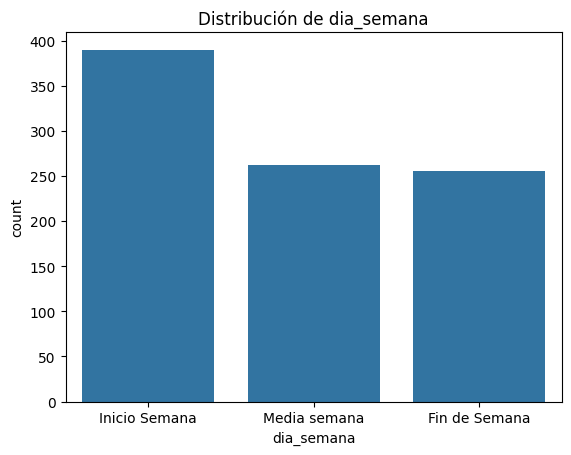

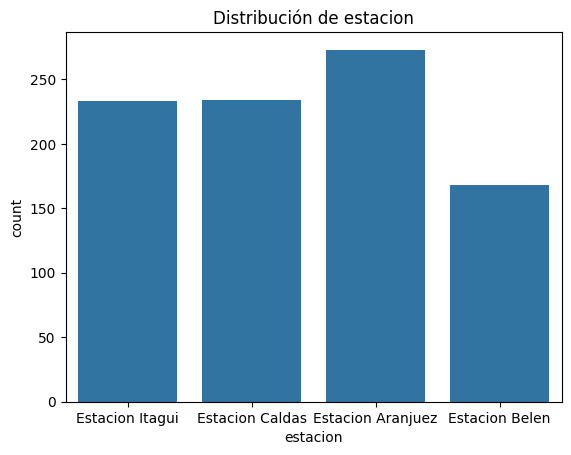

In [35]:
#Se recorre las columnas categoricas
for columna in columnasCategoricas:
    sns.countplot(x=dataSetCalidadAire[columna])
    plt.title(f"Distribución de {columna}")
    plt.show()


Visualización variables númericas

In [36]:
# Graficar las variables númericas con respecto a nuestra avriable objetivo que es pm25

# Histogramas de las variables númericas

# for columna in columnasNumericas:
#     sns.histplot(dataSetCalidadAire[columna], kde=True)
#     plt.title(f"Distribución de {columna}")
#     plt.show()

Box Plot de nuestra variable PM25

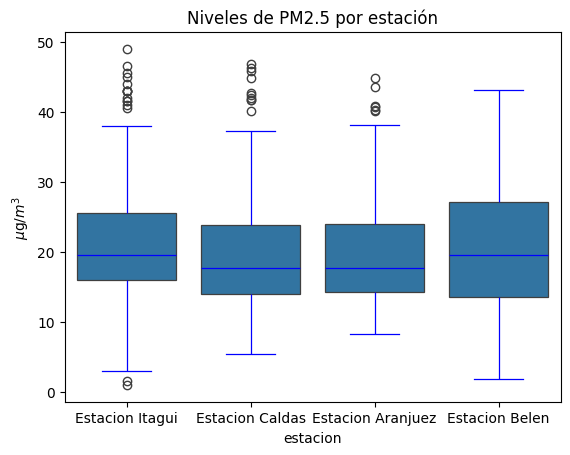

In [37]:
# Box Plot PM2.5 agrupado por estaciones
ax = sns.boxplot(x=dataSetCalidadAire['estacion'], y= dataSetCalidadAire['pm25'],  linewidth=0.9)
ax.set_title("Niveles de PM2.5 por estación")
plt.ylabel("$\mu$g/$m^3$")
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='blue')
plt.show()

### Eliminación de valores atípicos

In [38]:
#Calculo de valores atípicos

#Calculo de Q1 t Q3
Q1 = np.percentile(dataSetCalidadAire['pm25'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataSetCalidadAire['pm25'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
valorInferior = Q1 - 1.5*IQR
valorSuperior = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{valorInferior}')
print(f'Valor atípico leve superior:{valorSuperior}')

Valor atípico leve inferior:-1.25
Valor atípico leve superior:40.75


In [39]:
limpiaDataSetCalidadAire = dataSetCalidadAire.copy()

#Se tiene en cuenta los datos que se encuentren mayores a los valores de pm25 mayores al valor inferior
# y tambien lso que se encuentren menores al valor superior

limpiaDataSetCalidadAire = limpiaDataSetCalidadAire[(limpiaDataSetCalidadAire['pm25'] > valorInferior) & (limpiaDataSetCalidadAire['pm25'] < valorSuperior)]
limpiaDataSetCalidadAire.head()

anio  mes  dia  pm25     dia_semana         estacion  festivo  temperatura  \
0  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1    21.980000   
1  2024    1    2  11.0  Inicio Semana  Estacion Itagui        0    21.580000   
2  2024    1    3  13.0  Inicio Semana  Estacion Itagui        0    21.400000   
3  2024    1    4  21.0   Media semana  Estacion Itagui        0    21.804999   
4  2024    1    5  19.0   Media semana  Estacion Itagui        0    20.945000   

   humedad  presion   p1  velocidad_prom  velocidad_max  direccion_prom  \
0    81.00      0.0  0.0            1.76           2.50           108.0   
1    83.00      0.0  0.0            2.08           2.90            55.0   
2    76.21      0.0  0.0            1.87           2.70           114.0   
3    79.00      0.0  0.0            1.76           2.55           164.0   
4    79.32      0.0  0.0            1.94           2.80           167.5   

   direccion_max  
0           84.0  
1           56.0  
2           93.0  
3          151.0  
4          175.0

### Encontrar valores atipicos en las variables de entrada

In [40]:
#utilización de LocalOutlierFactor con 8 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=15 y el contaminante lo vamos a hacer con un porcentaje más 0.3 Esto fue para crear dataSetLimpia3.CSV
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)


# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(limpiaDataSetCalidadAire[columnasNumericas])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', limpiaDataSetCalidadAire[outliers].index.tolist())
# Eliminar los valores atípicos del dataframe original
limpiaDataSetCalidadAire = limpiaDataSetCalidadAire.loc[~outliers]
limpiaDataSetCalidadAire.head(3)

Indices de valores atípicos:  [3, 11, 12, 24, 35, 48, 57, 83, 209, 211, 31, 32, 38, 61, 127, 172, 1, 16, 25, 28, 37, 50, 55, 60, 82, 89, 90, 91, 94, 99, 100, 104, 105, 149, 180, 212, 238, 241, 251, 15, 113, 115, 116, 128]


anio  mes  dia  pm25     dia_semana         estacion  festivo  temperatura  \
0  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
1  2024    1    2  11.0  Inicio Semana  Estacion Itagui        0        21.58   
2  2024    1    3  13.0  Inicio Semana  Estacion Itagui        0        21.40   

   humedad  presion   p1  velocidad_prom  velocidad_max  direccion_prom  \
0    81.00      0.0  0.0            1.76            2.5           108.0   
1    83.00      0.0  0.0            2.08            2.9            55.0   
2    76.21      0.0  0.0            1.87            2.7           114.0   

   direccion_max  
0           84.0  
1           56.0  
2           93.0

In [41]:
#Cantidad de registros después de eliminar los valores atípicos del dataframe
print(f"DataSet sin eliminación de valores atipicos es de  : {len(dataSetCalidadAire)}")
print(f"DataSet con eliminación de valores atipicos es de  : {len(limpiaDataSetCalidadAire)}")


DataSet sin eliminación de valores atipicos es de  : 908
DataSet con eliminación de valores atipicos es de  : 835


### Realizamos proceso de estandarización de nuestro dataset

### Correlación variables con nuestra variable pm25

In [42]:
#Se crea una copia de nuestro datasetCalidad limpia sin atipicos
datosCorrelacion = limpiaDataSetCalidadAire.copy()
#Elimina variables categoricas para poder ver correlación 
# columnas  = ['dia_semana', 'estacion','franja_horaria']
columnas  = ['dia_semana', 'estacion']
datosCorrelacion = eliminarColumnas(datosCorrelacion,columnas)


Visualizamos la correlacion que tienen las caracteristicas sobre la variable de respuesta pm25

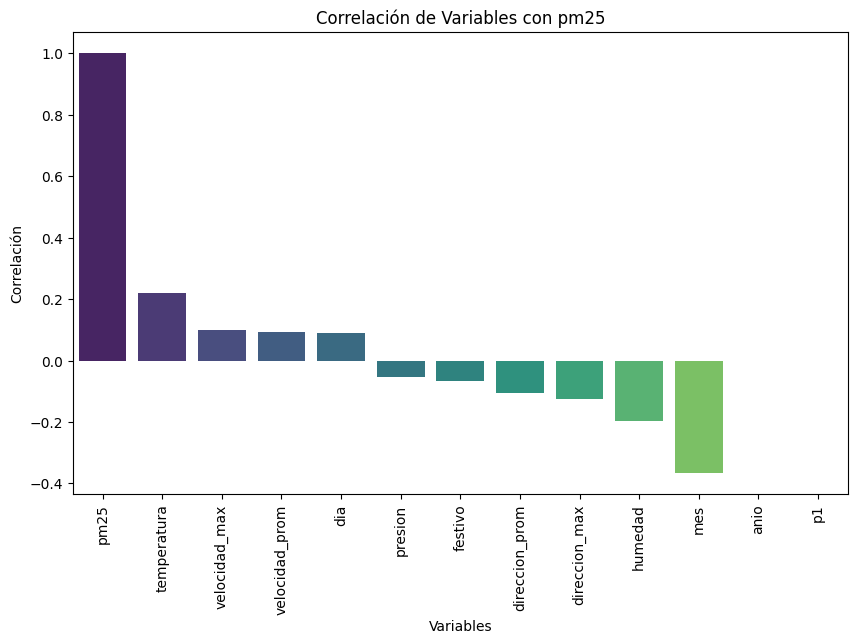

In [43]:

# Calcular la correlación de todas las variables con "pm25"
correlation = datosCorrelacion.corr()['pm25'].sort_values(ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlación de Variables con pm25')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

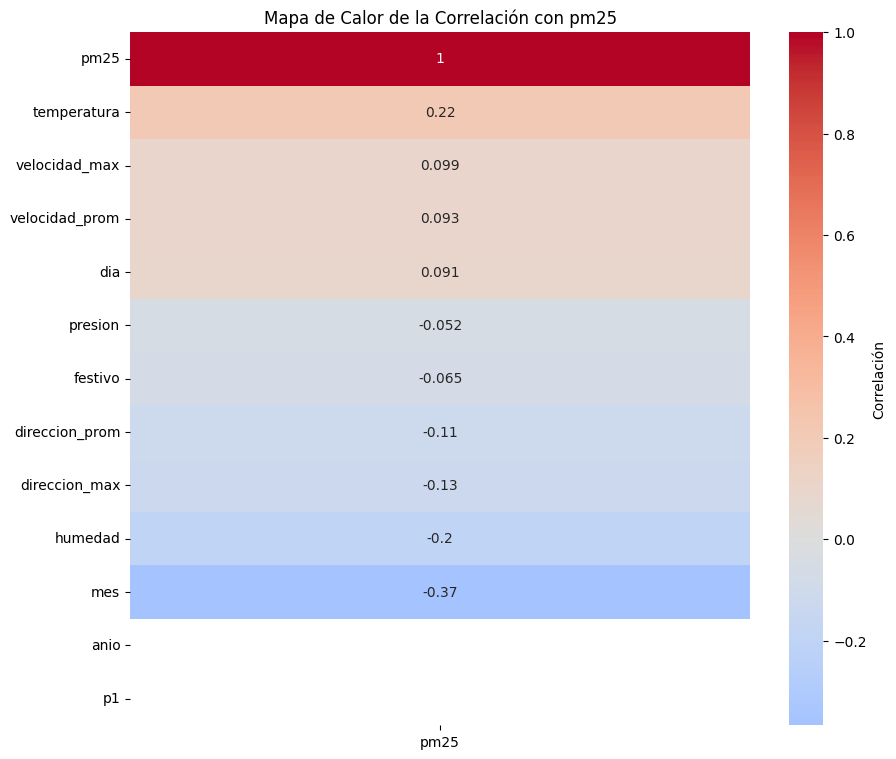

In [44]:
# Calcular la matriz de correlación
correlation_matrix = datosCorrelacion.corr()

# Filtrar para incluir solo la fila y columna de "pm25"
correlation_pm25 = correlation_matrix[['pm25']].sort_values(by='pm25', ascending=False)

# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_pm25, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de la Correlación con pm25')
plt.show()

Análisis final de nuestra limpieza

In [45]:
limpiaDataSetCalidadAire.describe()

anio         mes         dia        pm25     festivo  temperatura  \
count   835.0  835.000000  835.000000  835.000000  835.000000   835.000000   
mean   2024.0    5.234731   15.823952   19.718088    0.045509    21.832527   
std       0.0    2.646656    8.685079    7.083948    0.208543     2.146571   
min    2024.0    1.000000    1.000000    1.500000    0.000000    16.100000   
25%    2024.0    3.000000    8.000000   14.404550    0.000000    20.400000   
50%    2024.0    6.000000   16.000000   18.170500    0.000000    22.080000   
75%    2024.0    8.000000   23.000000   23.781800    0.000000    23.400000   
max    2024.0    9.000000   31.000000   40.640950    1.000000    28.299999   

          humedad     presion     p1  velocidad_prom  velocidad_max  \
count  835.000000  835.000000  835.0      835.000000     835.000000   
mean    74.216808  630.719371    0.0        1.382078       2.282335   
std      8.348807  365.967822    0.0        0.498917       0.734371   
min     51.000000    0.000000    0.0        0.280000       0.500000   
25%     68.200000    0.000000    0.0        1.040000       1.800000   
50%     74.805001  827.700000    0.0        1.400000       2.200000   
75%     81.225000  851.600000    0.0        1.700000       2.800000   
max     91.000000  854.600000    0.0        3.500000       5.000000   

       direccion_prom  direccion_max  
count      835.000000     835.000000  
mean       139.986228     150.966467  
std         63.470636      64.580648  
min         29.000000      35.000000  
25%         96.750000      87.750000  
50%        134.000000     158.000000  
75%        173.000000     196.250000  
max        345.500000     333.000000

### Archivo de nuestro dataset limpio calidad aire y metereológicas

In [46]:
#limpiaDataSetCalidadAire.to_csv("data/stage/dataSetLimpio.csv", index=False)
#Sin Imputación
limpiaDataSetCalidadAire.to_csv("data/stage/dataSetLimpio5.csv", index=False)

### Manipulación y Limpieza datos médicos RIPS

In [47]:
## Se importa el csv
rips = pd.read_csv("data/raw/datosMedicos/RIPS_J000_J989_2020-2024P.csv")

In [48]:
rips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436530 entries, 0 to 3436529
Data columns (total 13 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Encrypt                     object
 1   FechaConsulta               object
 2   TipoCupsAtencion            object
 3   sexo                        object
 4   edad                        int64 
 5   TipoUsuario                 int64 
 6   CodigoDiagnosticoPpal       object
 7   NombreDX                    object
 8   Nombre298                   object
 9   NombreIPS                   object
 10  NombreEAPB                  object
 11  FechaSalidaUrgencias        object
 12  FechaEgresoHospitalización  object
dtypes: int64(2), object(11)
memory usage: 340.8+ MB


In [49]:
len(rips)

3436530

Revisar la cantidad de IPS de nuestros datos médicos que tengan más de 1020 atenciones

In [50]:
columnaIPS = rips.groupby("NombreIPS").size()
columnaIPS2 =columnaIPS [columnaIPS >1020] 
columnaIPS2
#Guardamos el csv (Esto es solo la primera vez)
#columnaIPS2.to_csv("data/stage/nombresIPS.csv", index=True)

NombreIPS
AMANDA VIOLETA RODRIGUEZ DE PEREZ           3921
ANA MARIA DE LAS MERCEDES MEJIA GAVIRIA     7430
ANDRES FELIPE LONDOÑO BUSTAMANTE            2435
Aida Lida Castro Arias                      7628
Alina Restrepo Velez                        1386
                                           ...  
William Reinel Mejia Salazar                1566
especialistas en casa                      14162
helPharma Almacentro                       13013
jonathan rozenboim matiz                    1515
ÉDISON MORALES CÁRDENAS                     2748
Length: 214, dtype: int64

Se realizó en el archivo nombresIPS.csv agregar la columna comuna para saber la IPS en que comuna realiza el proceso médico

Eliminar Registros que no cumplan que los centros médicos tengan más de 1020 atenciones por diagnósticos de enfermedades respiratorias

In [51]:
comunaIPS = pd.read_csv("data/stage/nombresIPS.csv")
comunaIPS.head(8)

NombreIPS  conteo_ips comuna_ips
0        AMANDA VIOLETA RODRIGUEZ DE PEREZ        3921  comuna 14
1  ANA MARIA DE LAS MERCEDES MEJIA GAVIRIA        7430  comuna 14
2         ANDRES FELIPE LONDOÑO BUSTAMANTE        2435  comuna 10
3                   Aida Lida Castro Arias        7628  comuna 14
4                     Alina Restrepo Velez        1386  comuna 14
5                     Arenas Ruiz Carolina        2553  comuna 14
6          BEATRIZ CECILIA VILLEGAS ORTEGA        2184  comuna 14
7              BIENESTAR IPS SEDE MEDELLIN       10717   comuna 4

Aplicar al dataset RIPS agregar columna comuna

In [52]:
rips2 = pd.merge(rips, comunaIPS, on='NombreIPS', how='inner')
rips2.head(5)


Encrypt FechaConsulta  \
0  0x00002DED4396DEB1170CA180E1263A23C16C6DCF60CC...    2023-05-11   
1  0x00005427512BFF1AD5E02D07CB2EDAC0383EAFA2AEE2...    2024-05-23   
2  0x0000D652F2A46DC9AB562874465E7D2FF1E08F3843AD...    2020-02-21   
3  0x0000DA30FA3F9BA50AE5E82F085FD77EE5A0B596C235...    2021-09-20   
4  0x0001301D8B5F4EC23FFC2E5C1A129BA54469FC82F056...    2023-03-24   

  TipoCupsAtencion sexo  edad  TipoUsuario CodigoDiagnosticoPpal  \
0      AMBULATORIA    F    34            1                  J00X   
1      AMBULATORIA    F    15            2                  J329   
2      AMBULATORIA    M    79            1                  J029   
3      AMBULATORIA    M     2            1                  J00X   
4      AMBULATORIA    F    87            1                  J449   

                                            NombreDX  \
0             RINOFARINGITIS AGUDA [RESFRIADO COMUN]   
1                                  SINUSITIS CRONICA   
2                                   FARINGITIS AGUDA   
3             RINOFARINGITIS AGUDA [RESFRIADO COMUN]   
4  OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...   

                                           Nombre298  \
0  Otras Infecciones Agudas de las Vías Respirato...   
1                                  Sinusitis Crónica   
2               Faringitis Aguda y Amigdalitis Aguda   
3  Otras Infecciones Agudas de las Vías Respirato...   
4  Bronquitis enfisema y  otras Enfermedades Pulm...   

                       NombreIPS  \
0           CIS COMFAMA CALASANZ   
1         FUNDACIÓN CLÍNICA NOEL   
2  IPS SURA LOS MOLINOS MEDELLIN   
3        CENTRO DE SALUD MORAVIA   
4            VIVA 1A IPS ESTADIO   

                                          NombreEAPB FechaSalidaUrgencias  \
0         EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.                  NaN   
1                                  COOSALUD EPS S.A.                  NaN   
2         EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.                  NaN   
3  ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S. SAVIA SALUD                  NaN   
4  NUEVA EMPRESA PROMOTORA DE SALUD S.A. SIGLA NU...                  NaN   

  FechaEgresoHospitalización  conteo_ips comuna_ips  
0                        NaN       36229  comuna 12  
1                        NaN       15308  comuna 14  
2                        NaN       20673  comuna 16  
3                        NaN        2128   comuna 4  
4                        NaN       21307  comuna 11

### Eliminación de columnas 

Se eliminaron por motivos que detallamos que no son relevantes para el estudio

In [53]:
# Eliminar columna de no interés en el estudio del dataframe.
columnasAEliminar = ['Encrypt','TipoCupsAtencion','sexo','TipoUsuario','CodigoDiagnosticoPpal',
                     'NombreDX','Nombre298','NombreEAPB','FechaSalidaUrgencias','FechaEgresoHospitalización','conteo_ips']

#Eliminar columnas de datos médicos
rips2 = eliminarColumnas(rips2,columnasAEliminar)
rips2.head(5)

FechaConsulta  edad                      NombreIPS comuna_ips
0    2023-05-11    34           CIS COMFAMA CALASANZ  comuna 12
1    2024-05-23    15         FUNDACIÓN CLÍNICA NOEL  comuna 14
2    2020-02-21    79  IPS SURA LOS MOLINOS MEDELLIN  comuna 16
3    2021-09-20     2        CENTRO DE SALUD MORAVIA   comuna 4
4    2023-03-24    87            VIVA 1A IPS ESTADIO  comuna 11

Cantidad de datos médicos

In [54]:
len(rips2)

3335545

### Creación columnas de interés

Columnas fechas

In [55]:
def agregarColumnasFechas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['FechaConsulta']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['FechaConsulta']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['FechaConsulta']).dt.month
    return dataTemporal

# Agregar columnas de fechas

rips2 = agregarColumnasFechas(rips2)
rips2.head(5)

FechaConsulta  edad                      NombreIPS comuna_ips  anio  dia  \
0    2023-05-11    34           CIS COMFAMA CALASANZ  comuna 12  2023   11   
1    2024-05-23    15         FUNDACIÓN CLÍNICA NOEL  comuna 14  2024   23   
2    2020-02-21    79  IPS SURA LOS MOLINOS MEDELLIN  comuna 16  2020   21   
3    2021-09-20     2        CENTRO DE SALUD MORAVIA   comuna 4  2021   20   
4    2023-03-24    87            VIVA 1A IPS ESTADIO  comuna 11  2023   24   

   mes  
0    5  
1    5  
2    2  
3    9  
4    3

Crear columna Sector

In [56]:
def definirSectorIPS(comuna):
    """
    Función para definir el sector de las IPS
    args:   comuna_ips = comuna donde se encuentra la IPS
    In[0]: comuna
    Out[0]: sector_ips
    """
    if comuna == 'comuna 7' or comuna == 'comuna 6' or comuna == 'comuna 5':
        return 'Noroccidental'
    elif comuna == 'comuna 12' or comuna == 'comuna 11' or comuna == 'comuna 13':
        return 'Centroccidental'
    elif comuna == 'comuna 16' or comuna == 'comuna 15':
        return 'Suroccidental'
    elif comuna == 'comuna 2' or comuna == 'comuna 1' or comuna == 'comuna 3' or comuna == 'comuna 4':
        return 'Nororiental'
    elif comuna == 'comuna 8' or comuna == 'comuna 9' or comuna == 'comuna 10':
        return 'Centroriental'
    elif comuna == 'comuna 14':
        return 'Suroriental'
    else :
        return 'Sin comuna'
    
# # Aplicamos la función crearFranjaHoraria
rips2['sector_ips'] = rips2.apply(lambda row: definirSectorIPS(row['comuna_ips']), axis=1)
rips2.head(5)

FechaConsulta  edad                      NombreIPS comuna_ips  anio  dia  \
0    2023-05-11    34           CIS COMFAMA CALASANZ  comuna 12  2023   11   
1    2024-05-23    15         FUNDACIÓN CLÍNICA NOEL  comuna 14  2024   23   
2    2020-02-21    79  IPS SURA LOS MOLINOS MEDELLIN  comuna 16  2020   21   
3    2021-09-20     2        CENTRO DE SALUD MORAVIA   comuna 4  2021   20   
4    2023-03-24    87            VIVA 1A IPS ESTADIO  comuna 11  2023   24   

   mes       sector_ips  
0    5  Centroccidental  
1    5      Suroriental  
2    2    Suroccidental  
3    9      Nororiental  
4    3  Centroccidental

In [57]:
rips2.drop('FechaConsulta',axis=1,inplace=True)
rips2.head(5)

edad                      NombreIPS comuna_ips  anio  dia  mes  \
0    34           CIS COMFAMA CALASANZ  comuna 12  2023   11    5   
1    15         FUNDACIÓN CLÍNICA NOEL  comuna 14  2024   23    5   
2    79  IPS SURA LOS MOLINOS MEDELLIN  comuna 16  2020   21    2   
3     2        CENTRO DE SALUD MORAVIA   comuna 4  2021   20    9   
4    87            VIVA 1A IPS ESTADIO  comuna 11  2023   24    3   

        sector_ips  
0  Centroccidental  
1      Suroriental  
2    Suroccidental  
3      Nororiental  
4  Centroccidental

Creación Columna Atención pacientes por IPS y fecha

In [58]:
# Contamos las filas por cada combinación de 'anio', 'mes' y 'dia' y 'NombreIPS'
rips2['atenciones_por_dia'] = rips2.groupby(['NombreIPS','anio', 'mes', 'dia'])['edad'].transform('count')
rips2.head(5)

    

edad                      NombreIPS comuna_ips  anio  dia  mes  \
0    34           CIS COMFAMA CALASANZ  comuna 12  2023   11    5   
1    15         FUNDACIÓN CLÍNICA NOEL  comuna 14  2024   23    5   
2    79  IPS SURA LOS MOLINOS MEDELLIN  comuna 16  2020   21    2   
3     2        CENTRO DE SALUD MORAVIA   comuna 4  2021   20    9   
4    87            VIVA 1A IPS ESTADIO  comuna 11  2023   24    3   

        sector_ips  atenciones_por_dia  
0  Centroccidental                  58  
1      Suroriental                  15  
2    Suroccidental                  97  
3      Nororiental                   2  
4  Centroccidental                  39

Guardar Archivo

In [59]:
rips2.to_csv("data/stage/dataSetLimpioRIPS.csv",index=False)

### Concatenación de nuestrso dos dataframes Limpios

In [60]:
dataSetCompleto = pd.merge(limpiaDataSetCalidadAire, rips2, on=['anio','mes','dia'], how='inner')
dataSetCompleto.head(5)

anio  mes  dia  pm25     dia_semana         estacion  festivo  temperatura  \
0  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
1  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
2  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
3  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
4  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   

   humedad  presion   p1  velocidad_prom  velocidad_max  direccion_prom  \
0     81.0      0.0  0.0            1.76            2.5           108.0   
1     81.0      0.0  0.0            1.76            2.5           108.0   
2     81.0      0.0  0.0            1.76            2.5           108.0   
3     81.0      0.0  0.0            1.76            2.5           108.0   
4     81.0      0.0  0.0            1.76            2.5           108.0   

   direccion_max  edad                                          NombreIPS  \
0           84.0     3  EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...   
1           84.0     0                         HOSPITAL PABLO TOBON URIBE   
2           84.0    62  MESSER COLOMBIA S.A. AGENCIA REMEO CENTER MEDE...   
3           84.0     3  Corporación Hospital Infantil Concejo de Medellín   
4           84.0    61                UNIDAD HOSPITALARIA NUEVO OCCIDENTE   

  comuna_ips       sector_ips  atenciones_por_dia  
0  comuna 14      Suroriental                 187  
1   comuna 7    Noroccidental                  80  
2  comuna 14      Suroriental                 109  
3   comuna 4      Nororiental                  48  
4  comuna 12  Centroccidental                  13

Guardamos archivo

In [61]:
dataSetCompleto.to_csv('data/stage/dataSetCompleto.csv',index=False)

### Revisión del dataSetCompleto

In [62]:
dataSetCompleto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105772 entries, 0 to 2105771
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   anio                int32  
 1   mes                 int32  
 2   dia                 int32  
 3   pm25                float64
 4   dia_semana          object 
 5   estacion            object 
 6   festivo             int64  
 7   temperatura         float64
 8   humedad             float64
 9   presion             float64
 10  p1                  float64
 11  velocidad_prom      float64
 12  velocidad_max       float64
 13  direccion_prom      float64
 14  direccion_max       float64
 15  edad                int64  
 16  NombreIPS           object 
 17  comuna_ips          object 
 18  sector_ips          object 
 19  atenciones_por_dia  int64  
dtypes: float64(9), int32(3), int64(3), object(5)
memory usage: 297.2+ MB


Listado de las variables

In [63]:
#Lista de variables categóricas
columnasCategoricasCompleto = dataSetCompleto.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricasCompleto
dataSetCompleto[columnasCategoricasCompleto].head(3)

dia_semana         estacion  \
0  Inicio Semana  Estacion Itagui   
1  Inicio Semana  Estacion Itagui   
2  Inicio Semana  Estacion Itagui   

                                           NombreIPS comuna_ips     sector_ips  
0  EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...  comuna 14    Suroriental  
1                         HOSPITAL PABLO TOBON URIBE   comuna 7  Noroccidental  
2  MESSER COLOMBIA S.A. AGENCIA REMEO CENTER MEDE...  comuna 14    Suroriental

In [64]:
#Lista de variables numéricas
columnasNumericasCompleto=dataSetCompleto.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetCompleto[columnasNumericasCompleto].head(3)

anio  mes  dia  pm25  festivo  temperatura  humedad  presion   p1  \
0  2024    1    1  18.5        1        21.98     81.0      0.0  0.0   
1  2024    1    1  18.5        1        21.98     81.0      0.0  0.0   
2  2024    1    1  18.5        1        21.98     81.0      0.0  0.0   

   velocidad_prom  velocidad_max  direccion_prom  direccion_max  edad  \
0            1.76            2.5           108.0           84.0     3   
1            1.76            2.5           108.0           84.0     0   
2            1.76            2.5           108.0           84.0    62   

   atenciones_por_dia  
0                 187  
1                  80  
2                 109

Visualización variable de Salida del estudio que son las atenciones por día 

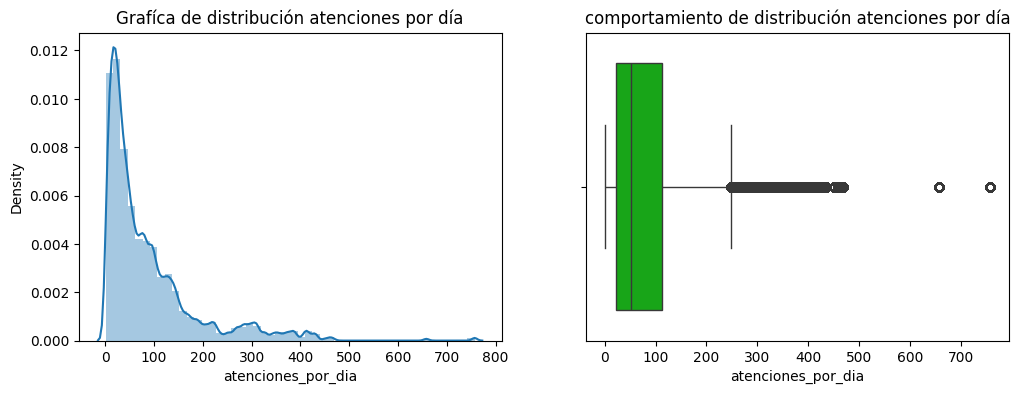

In [65]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Grafíca de distribución atenciones por día')
sns.distplot(dataSetCompleto.atenciones_por_dia)

plt.subplot(1,2,2)
plt.title('comportamiento de distribución atenciones por día')
sns.boxplot(x=dataSetCompleto.atenciones_por_dia, palette='nipy_spectral')

plt.show()

### Limpieza de los datos

Revisar los datos atípicos de acuerdo al rango intercuantil 

In [66]:
#Calculo de Q1 t Q3
Q1 = np.percentile(dataSetCompleto['atenciones_por_dia'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataSetCompleto['atenciones_por_dia'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
valorInferior = Q1 - 1.5*IQR
valorSuperior = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{valorInferior}')
print(f'Valor atípico leve superior:{valorSuperior}')

Valor atípico leve inferior:-112.0
Valor atípico leve superior:248.0


In [67]:
#Se tiene en cuenta los datos que se encuentren mayores a los valores de atenciones_por_dia mayores al valor inferior
# y tambien los que se encuentren menores al valor superior

dataSetCompleto = dataSetCompleto[(dataSetCompleto['atenciones_por_dia'] > valorInferior) & (dataSetCompleto['atenciones_por_dia'] < valorSuperior)]
dataSetCompleto.head()

anio  mes  dia  pm25     dia_semana         estacion  festivo  temperatura  \
0  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
1  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
2  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
3  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
4  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   

   humedad  presion   p1  velocidad_prom  velocidad_max  direccion_prom  \
0     81.0      0.0  0.0            1.76            2.5           108.0   
1     81.0      0.0  0.0            1.76            2.5           108.0   
2     81.0      0.0  0.0            1.76            2.5           108.0   
3     81.0      0.0  0.0            1.76            2.5           108.0   
4     81.0      0.0  0.0            1.76            2.5           108.0   

   direccion_max  edad                                          NombreIPS  \
0           84.0     3  EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...   
1           84.0     0                         HOSPITAL PABLO TOBON URIBE   
2           84.0    62  MESSER COLOMBIA S.A. AGENCIA REMEO CENTER MEDE...   
3           84.0     3  Corporación Hospital Infantil Concejo de Medellín   
4           84.0    61                UNIDAD HOSPITALARIA NUEVO OCCIDENTE   

  comuna_ips       sector_ips  atenciones_por_dia  
0  comuna 14      Suroriental                 187  
1   comuna 7    Noroccidental                  80  
2  comuna 14      Suroriental                 109  
3   comuna 4      Nororiental                  48  
4  comuna 12  Centroccidental                  13

Eliminación de Atípicos de acuerdo a LocalOutlierFactor

In [68]:
#utilización de LocalOutlierFactor con 8 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=10 y el contaminante lo vamos a hacer con un porcentaje más 0.1.
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.10)


# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(dataSetCompleto[columnasNumericasCompleto])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', dataSetCompleto[outliers].index.tolist())
# Eliminar los valores atípicos del dataframe completo
dataSetCompleto = dataSetCompleto.loc[~outliers]
dataSetCompleto.head(3)

Indices de valores atípicos:  [10, 15, 21, 22, 42, 46, 54, 55, 58, 86, 93, 123, 125, 126, 143, 146, 155, 157, 182, 191, 195, 207, 209, 227, 246, 252, 256, 257, 265, 270, 295, 299, 319, 327, 332, 333, 340, 342, 346, 354, 358, 362, 374, 379, 382, 389, 391, 402, 409, 432, 439, 440, 456, 465, 492, 509, 511, 519, 520, 535, 544, 549, 576, 582, 585, 590, 591, 596, 608, 616, 636, 639, 641, 642, 643, 662, 708, 710, 731, 732, 733, 755, 761, 766, 773, 774, 782, 785, 788, 803, 804, 812, 813, 824, 825, 834, 840, 845, 865, 915, 941, 943, 945, 956, 962, 966, 971, 972, 985, 990, 1002, 1013, 1023, 1049, 1051, 1054, 1057, 1063, 1065, 1067, 1072, 1074, 1082, 1098, 1099, 1112, 1114, 1121, 1126, 1129, 1139, 1142, 1150, 1161, 1162, 1164, 1165, 1182, 1194, 1204, 1208, 1217, 1224, 1267, 1289, 1293, 1395, 1408, 1414, 1432, 1456, 1460, 1473, 1483, 1580, 1604, 1624, 1638, 1664, 1682, 1702, 1735, 1769, 1786, 1809, 1821, 1827, 1838, 1843, 1845, 1852, 1861, 1866, 1882, 1883, 1900, 1910, 1914, 1921, 1928, 1937, 1948

anio  mes  dia  pm25     dia_semana         estacion  festivo  temperatura  \
0  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
1  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
2  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   

   humedad  presion   p1  velocidad_prom  velocidad_max  direccion_prom  \
0     81.0      0.0  0.0            1.76            2.5           108.0   
1     81.0      0.0  0.0            1.76            2.5           108.0   
2     81.0      0.0  0.0            1.76            2.5           108.0   

   direccion_max  edad                                          NombreIPS  \
0           84.0     3  EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...   
1           84.0     0                         HOSPITAL PABLO TOBON URIBE   
2           84.0    62  MESSER COLOMBIA S.A. AGENCIA REMEO CENTER MEDE...   

  comuna_ips     sector_ips  atenciones_por_dia  
0  comuna 14    Suroriental                 187  
1   comuna 7  Noroccidental                  80  
2  comuna 14    Suroriental                 109

Eliminación de columna NombreIPS

In [69]:
dataSetCompleto.drop('NombreIPS',axis=1,inplace=True)
dataSetCompleto.head(5)

anio  mes  dia  pm25     dia_semana         estacion  festivo  temperatura  \
0  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
1  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
2  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
3  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   
4  2024    1    1  18.5  Inicio Semana  Estacion Itagui        1        21.98   

   humedad  presion   p1  velocidad_prom  velocidad_max  direccion_prom  \
0     81.0      0.0  0.0            1.76            2.5           108.0   
1     81.0      0.0  0.0            1.76            2.5           108.0   
2     81.0      0.0  0.0            1.76            2.5           108.0   
3     81.0      0.0  0.0            1.76            2.5           108.0   
4     81.0      0.0  0.0            1.76            2.5           108.0   

   direccion_max  edad comuna_ips       sector_ips  atenciones_por_dia  
0           84.0     3  comuna 14      Suroriental                 187  
1           84.0     0   comuna 7    Noroccidental                  80  
2           84.0    62  comuna 14      Suroriental                 109  
3           84.0     3   comuna 4      Nororiental                  48  
4           84.0    61  comuna 12  Centroccidental                  13

### One Hot de nuestras variables.

In [70]:
dataSetCompleto= pd.get_dummies(dataSetCompleto)
dataSetCompleto = dataSetCompleto.astype(int)
dataSetCompleto.head(4)

anio  mes  dia  pm25  festivo  temperatura  humedad  presion  p1  \
0  2024    1    1    18        1           21       81        0   0   
1  2024    1    1    18        1           21       81        0   0   
2  2024    1    1    18        1           21       81        0   0   
3  2024    1    1    18        1           21       81        0   0   

   velocidad_prom  ...  comuna_ips_comuna 9  comuna_ips_comuna 90  \
0               1  ...                    0                     0   
1               1  ...                    0                     0   
2               1  ...                    0                     0   
3               1  ...                    0                     0   

   comuna_ips_comuna10  sector_ips_Centroccidental  sector_ips_Centroriental  \
0                    0                           0                         0   
1                    0                           0                         0   
2                    0                           0                         0   
3                    0                           0                         0   

   sector_ips_Noroccidental  sector_ips_Nororiental  sector_ips_Sin comuna  \
0                         0                       0                      0   
1                         1                       0                      0   
2                         0                       0                      0   
3                         0                       1                      0   

   sector_ips_Suroccidental  sector_ips_Suroriental  
0                         0                       1  
1                         0                       0  
2                         0                       1  
3                         0                       0  

[4 rows x 51 columns]

Guardamos nuestro dataSetCompleto ya que hicimos limpieza de datos y a su vez realizamos one hot encoding de nuestras variables categoricas

In [71]:
dataSetCompleto.to_csv("data/stage/dataSetCompletoLimpio.csv",index=False)

Correlación de nuestros datos

In [72]:
#Se crea una copia de nuestro datasetCalidad limpia sin atipicos
datosCorrelacion = dataSetCompleto.copy()
#Elimina variables categoricas para poder ver correlación 
# columnas  = ['dia_semana', 'estacion','franja_horaria']
# columnas  = ['dia_semana', 'estacion']
#datosCorrelacion = eliminarColumnas(columnasCategoricasCompleto,columnas)

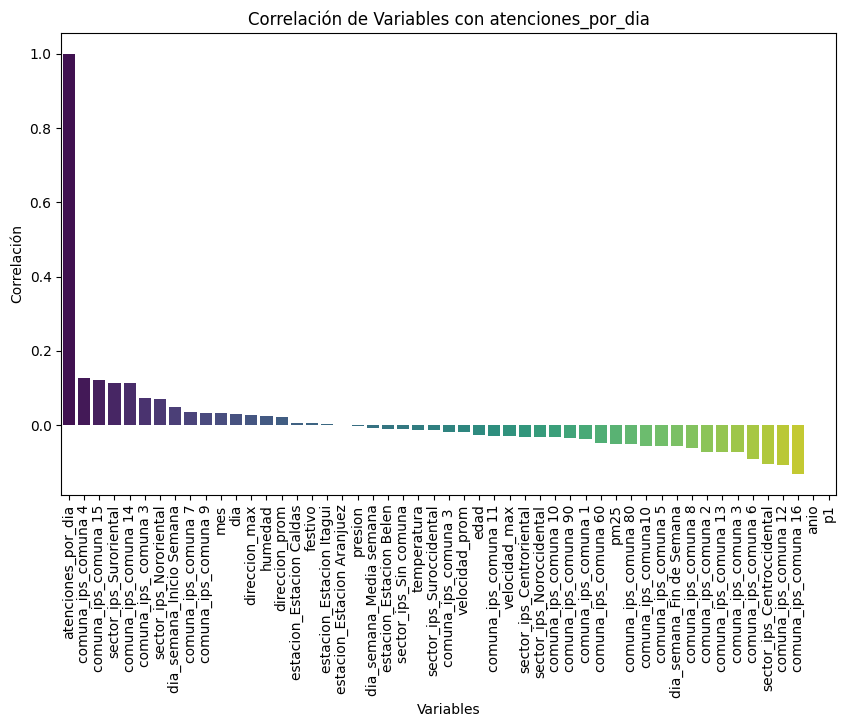

In [73]:
# Calcular la correlación de todas las variables con "atenciones_por_dia"
correlation = datosCorrelacion.corr()['atenciones_por_dia'].sort_values(ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlación de Variables con atenciones_por_dia')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

Mapa de calor

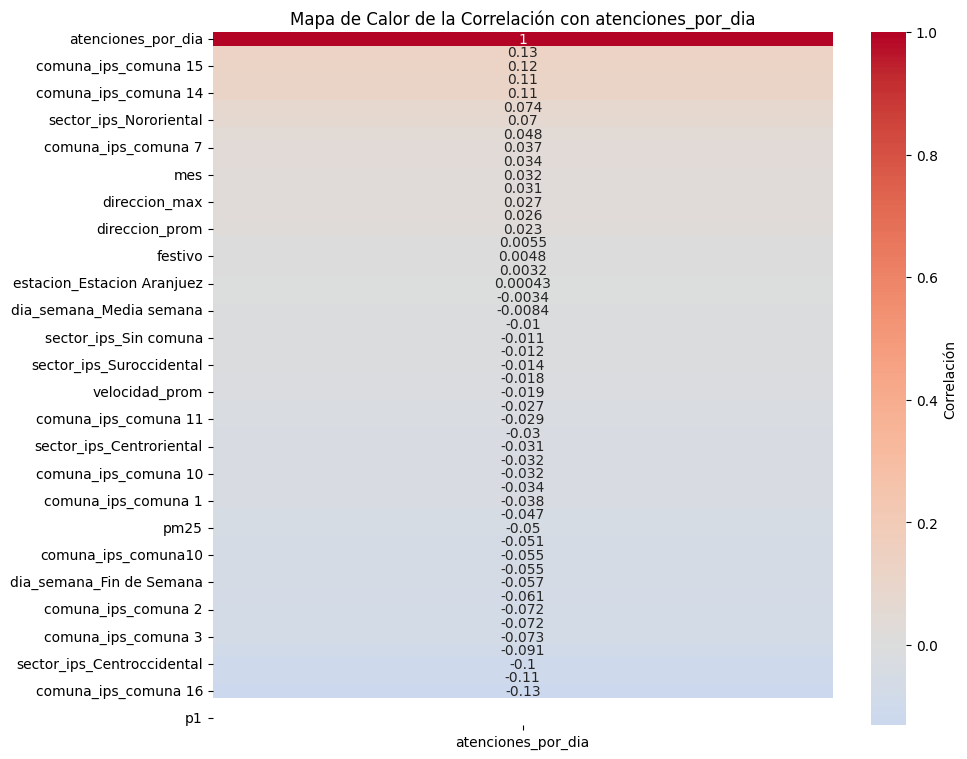

In [74]:
# Calcular la matriz de correlación
correlation_matrix = datosCorrelacion.corr()

# Filtrar para incluir solo la fila y columna de "atenciones_por_dia"
correlation_atenciones_por_dia = correlation_matrix[['atenciones_por_dia']].sort_values(by='atenciones_por_dia', ascending=False)

# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_atenciones_por_dia, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de la Correlación con atenciones_por_dia')
plt.show()

Mapa de calor para todas nuestras características

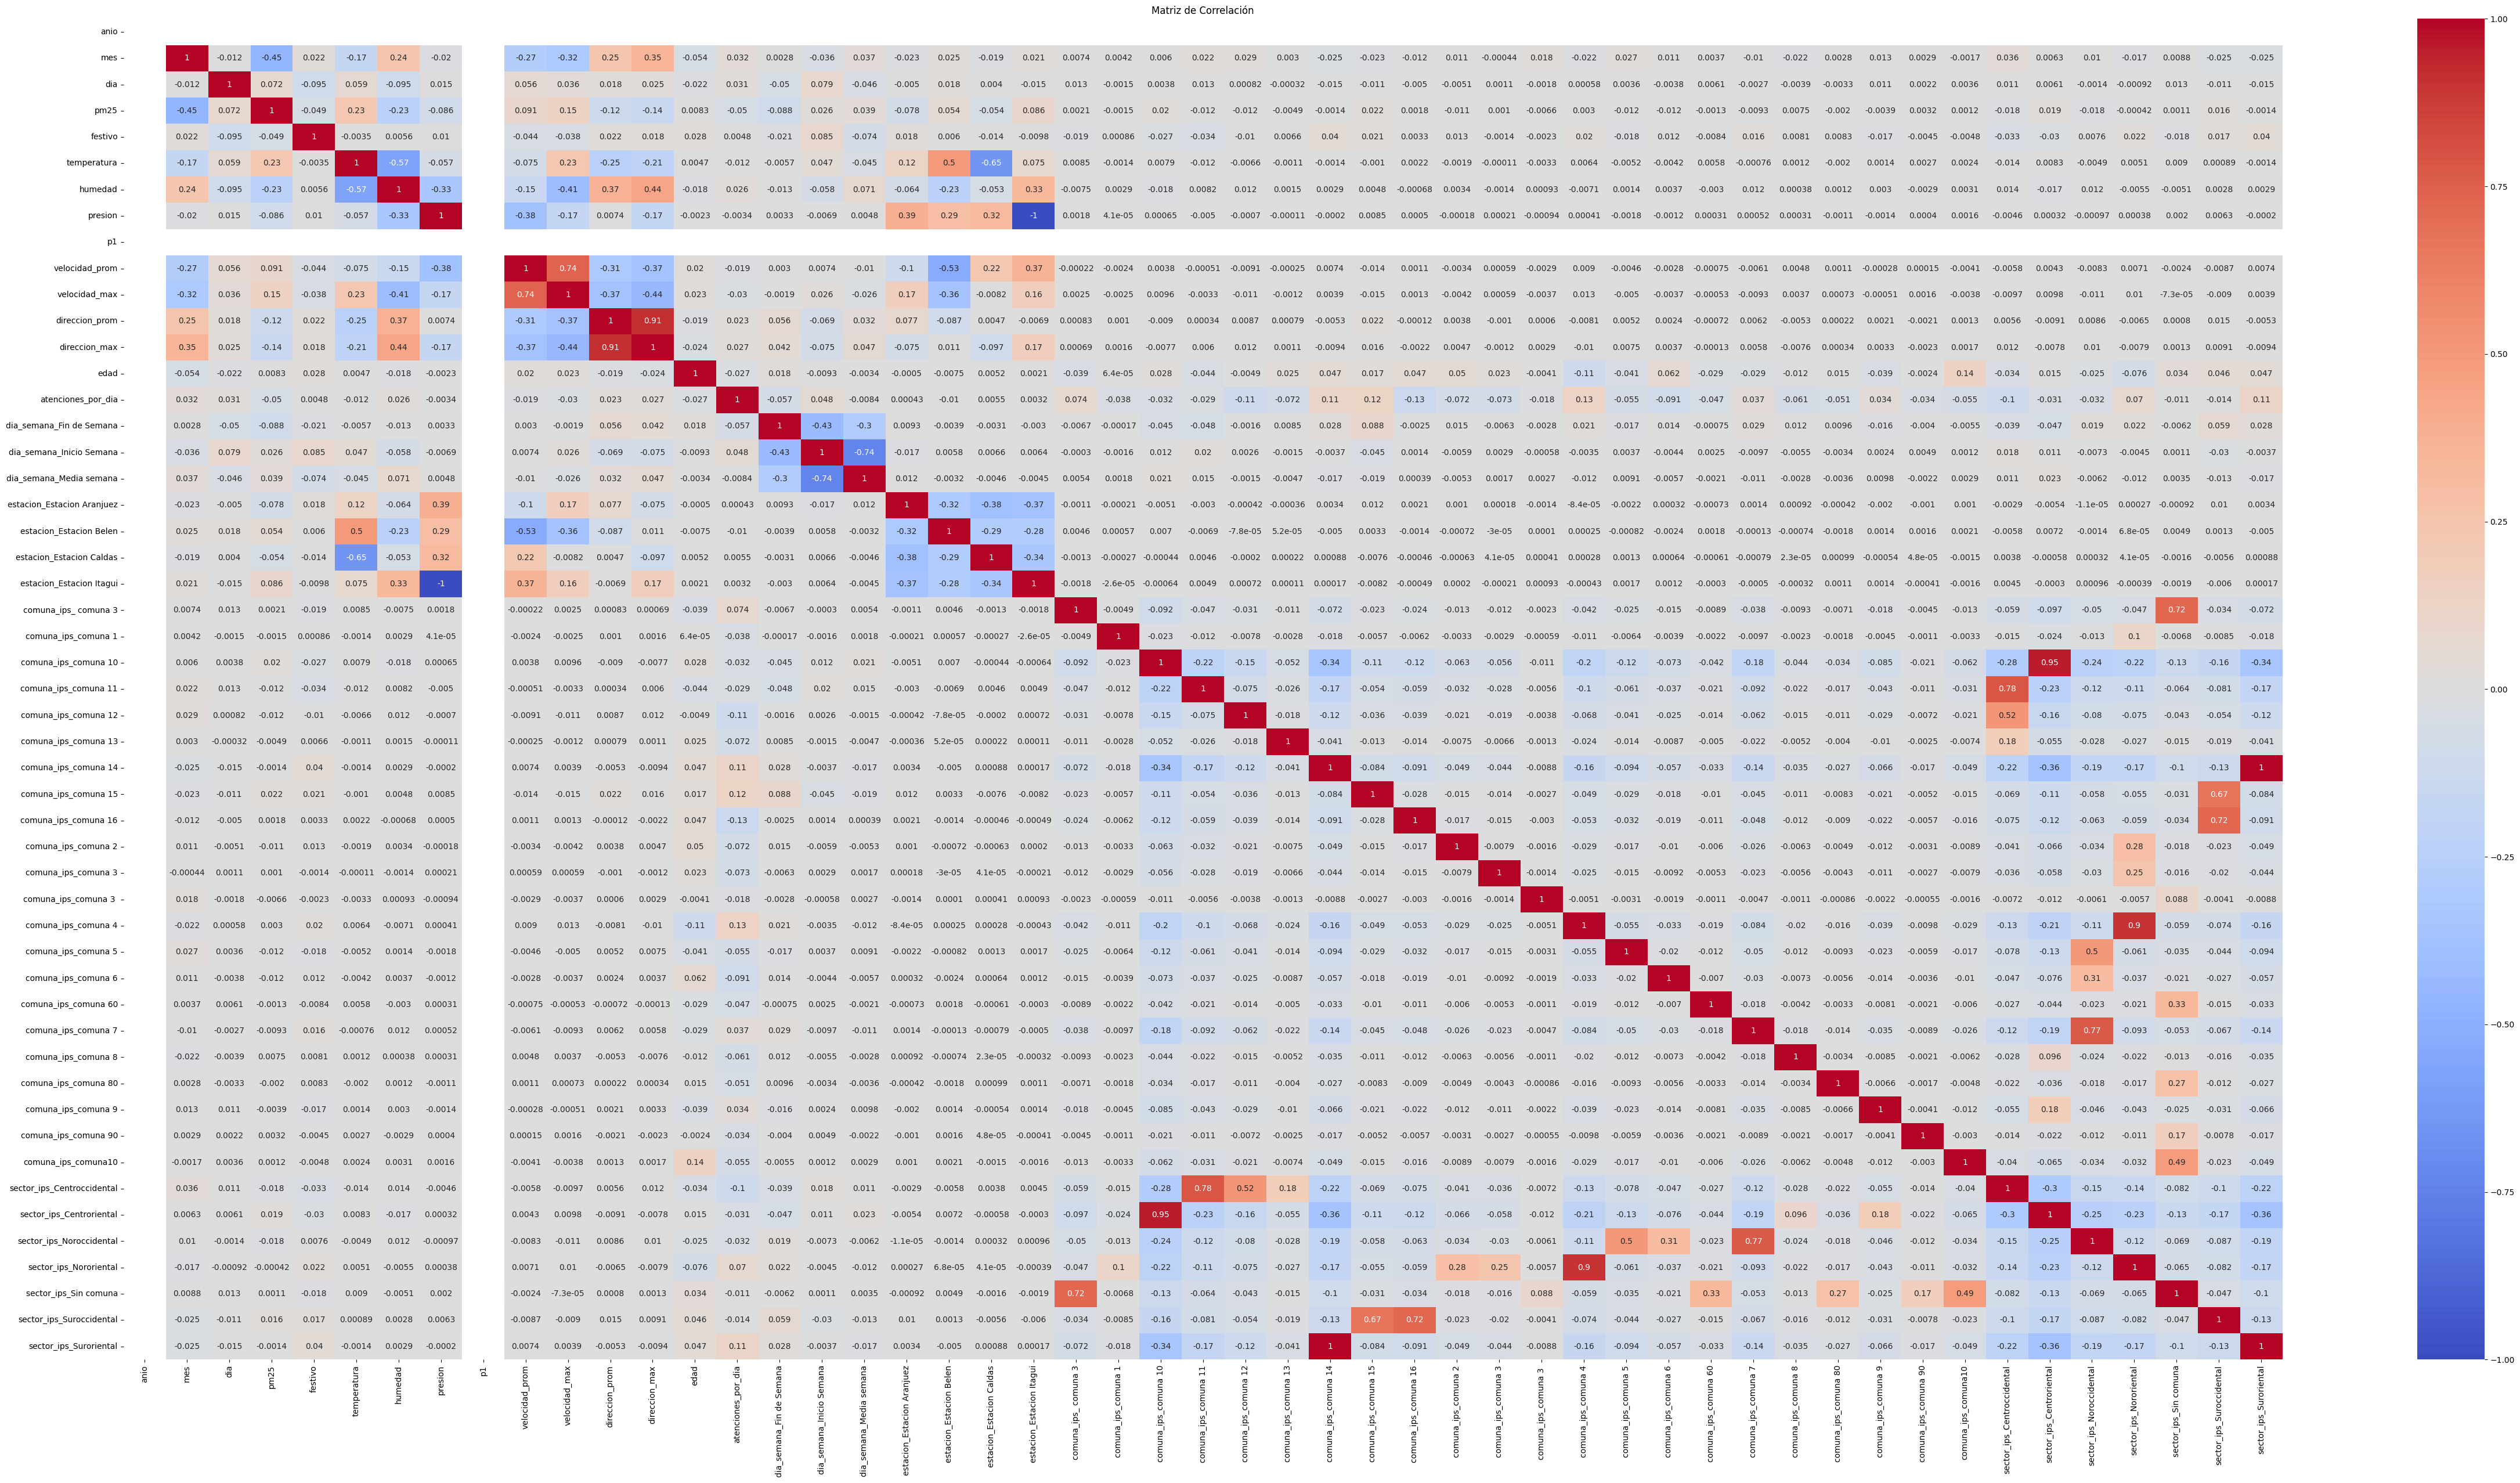

In [75]:
# Calcular la matriz de correlación
corr_matrix = datosCorrelacion.corr()

# Crear el mapa de calor
plt.figure(figsize=(60, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

Escalamiento de los datos

In [76]:
X = dataSetCompleto.drop(columns ='atenciones_por_dia') #Variable salida que queremos predecir se elimina para su escalamiento
y = dataSetCompleto['atenciones_por_dia']#Variable salida que queremos predecir

In [77]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7, #70 % de nuestros datos en entrenamiento
    random_state=1234,
    shuffle=True
)

#Se guardan los Y test para después evaluar nuestros modelos
#y_test.to_csv("data/stage/datosYtest.csv", index=False)
y_test.to_csv("data/stage/datosYtestDataSetCompleto.csv", index=False)

In [78]:
# Se toma las columnas de entrada
columnasModelo = X.columns.tolist()
columnasModelo 
# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()
# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[columnasModelo] = scaler.fit_transform(X_train[columnasModelo])
X_test[columnasModelo] = scaler.transform(X_test[columnasModelo])

X_train[columnasModelo].head(4)

anio       mes       dia      pm25  festivo  temperatura  humedad  \
833072    0.0  0.714286  0.033333  0.236842      0.0     0.250000    0.675   
1381744   0.0  0.571429  0.333333  0.394737      0.0     0.416667    0.775   
1765230   0.0  0.142857  0.633333  0.657895      0.0     0.916667    0.050   
1363327   0.0  0.571429  0.166667  0.210526      0.0     0.583333    0.625   

          presion   p1  velocidad_prom  ...  comuna_ips_comuna 9  \
833072   0.966042  0.0        0.333333  ...                  0.0   
1381744  0.997658  0.0        0.000000  ...                  0.0   
1765230  0.996487  0.0        0.333333  ...                  0.0   
1363327  0.996487  0.0        0.333333  ...                  0.0   

         comuna_ips_comuna 90  comuna_ips_comuna10  \
833072                    0.0                  0.0   
1381744                   0.0                  0.0   
1765230                   0.0                  0.0   
1363327                   0.0                  0.0   

         sector_ips_Centroccidental  sector_ips_Centroriental  \
833072                          1.0                       0.0   
1381744                         0.0                       0.0   
1765230                         0.0                       0.0   
1363327                         0.0                       1.0   

         sector_ips_Noroccidental  sector_ips_Nororiental  \
833072                        0.0                     0.0   
1381744                       0.0                     0.0   
1765230                       0.0                     1.0   
1363327                       0.0                     0.0   

         sector_ips_Sin comuna  sector_ips_Suroccidental  \
833072                     0.0                       0.0   
1381744                    0.0                       1.0   
1765230                    0.0                       0.0   
1363327                    0.0                       0.0   

         sector_ips_Suroriental  
833072                      0.0  
1381744                     0.0  
1765230                     0.0  
1363327                     0.0  

[4 rows x 50 columns]

Prueba de normalidad de nuestros datos

In [79]:
# columnas binarias no se toman en cuenta
columnas = dataSetCompleto.columns.to_list() # 
columnas =columnas[:15]
columnas

['anio',
 'mes',
 'dia',
 'pm25',
 'festivo',
 'temperatura',
 'humedad',
 'presion',
 'p1',
 'velocidad_prom',
 'velocidad_max',
 'direccion_prom',
 'direccion_max',
 'edad',
 'atenciones_por_dia']

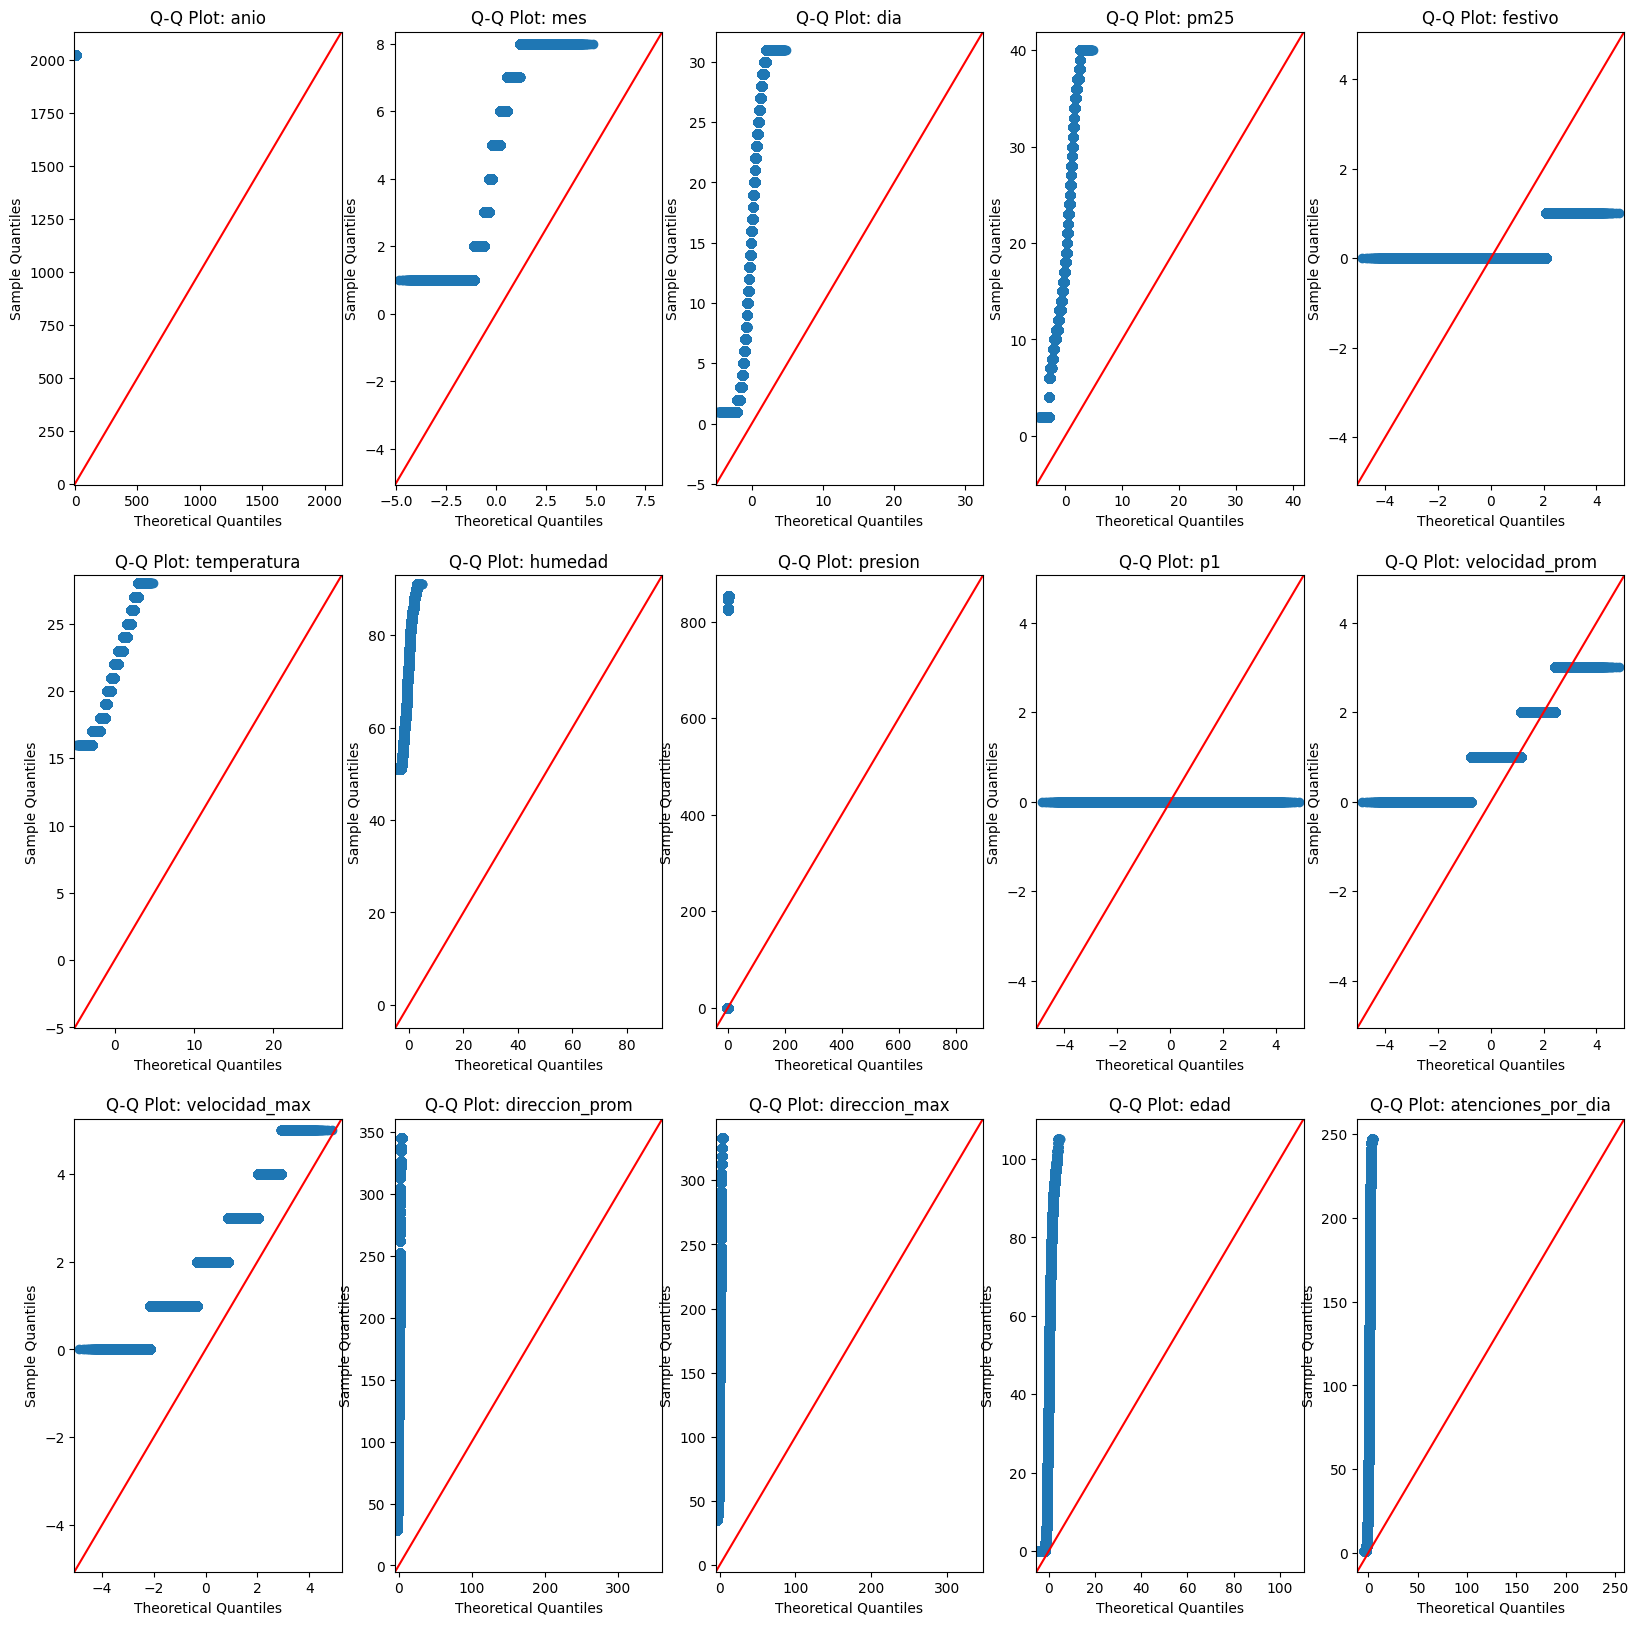

In [80]:
# Crear la figura y los subplots
fig, axes = plt.subplots(3, 5, figsize=(20,20))

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()
for i, col in enumerate(columnas):
    sm.qqplot(dataSetCompleto[col], line='45', ax=axes[i])
    axes[i].set_title(f"Q-Q Plot: {col}")



Normalidad de los datos con KDE -> Estimación de densidad de kernel suavizando la distribución para crear una curva continua que representa la densidad de probabilidad de los datos

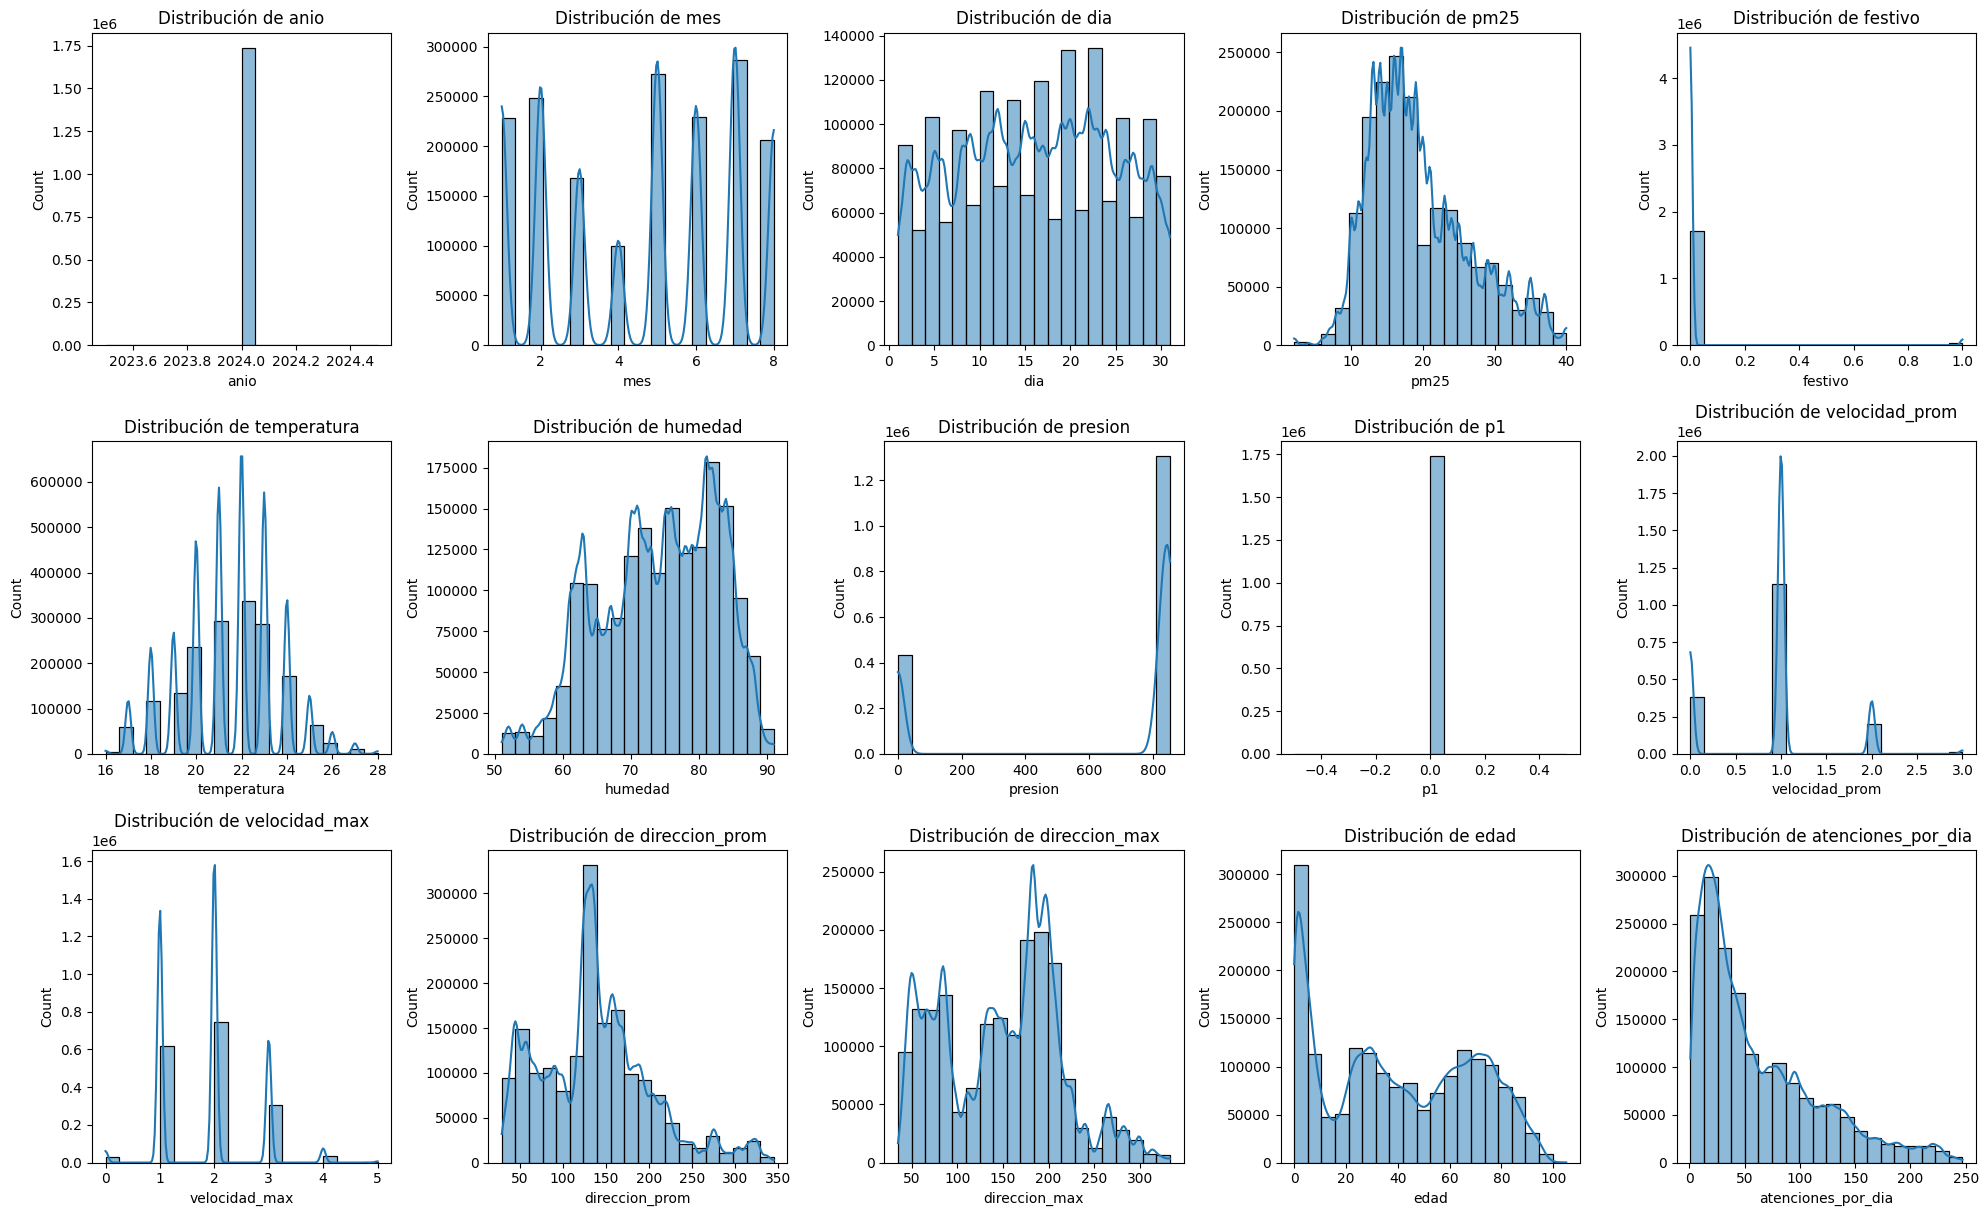

In [81]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(columnas, 1):
    plt.subplot(5, 5, i)  # Ajusta las filas y columnas de los subgráficos
    sns.histplot(dataSetCompleto[column], kde=True, bins=20)  # Histograma con KDE
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

## Conclusión de las gráficas

Dado el comportamiento asímetrico de las distribuciones de los datos, estos no se comporatan bajo una distribución Normal debido al sesgo de las colas inferiores en la mayoría de las columnas y principalmente en nuestra variable de estudio "atenciones_por_dia"

### Pruebas de Shapiro

In [82]:
# Supongamos que 'columnas' es una lista con los nombres de las columnas que quieres probar
for col in columnas:
    # Realizar la prueba de Shapiro-Wilk
    stat, p_value = stats.shapiro(dataSetCompleto[col])
    
    # Mostrar los resultados
    print(f"Prueba de Shapiro-Wilk para {col}:")
    print(f" Estadístico de la prueba = {stat}")
    print(f" Valor p = {p_value}")
    
    # Evaluar el valor p para determinar si los datos son normales
    if p_value < 0.05:
        print(f"Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test de Shapiro para la columna {col}")
    else :
        print(f"Hipótesis nula aceptada: los residuos se distribuyen de forma normal por el test de Shapiro para la columna {col}")


Prueba de Shapiro-Wilk para anio:
 Estadístico de la prueba = 1.0
 Valor p = 1.0
Hipótesis nula aceptada: los residuos se distribuyen de forma normal por el test de Shapiro para la columna anio
Prueba de Shapiro-Wilk para mes:
 Estadístico de la prueba = 0.9087091524574381
 Valor p = 4.049683920263755e-157
Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test de Shapiro para la columna mes
Prueba de Shapiro-Wilk para dia:
 Estadístico de la prueba = 0.9627455304642527
 Valor p = 5.0832585956828245e-129
Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test de Shapiro para la columna dia
Prueba de Shapiro-Wilk para pm25:
 Estadístico de la prueba = 0.9481630063551212
 Valor p = 4.745091381322065e-139
Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test de Shapiro para la columna pm25
Prueba de Shapiro-Wilk para festivo:
 Estadístico de la prueba = 0.11361960792205639
 Valor p = 5.926479540553421

Podemos verificar que tanto por el medio gráfico como por el medio estadístico por el test de shapiro nuestros datos no presentan comportamientos de distribución normal

### Box plot 

Revisar el comportamiento de nuestras columnas

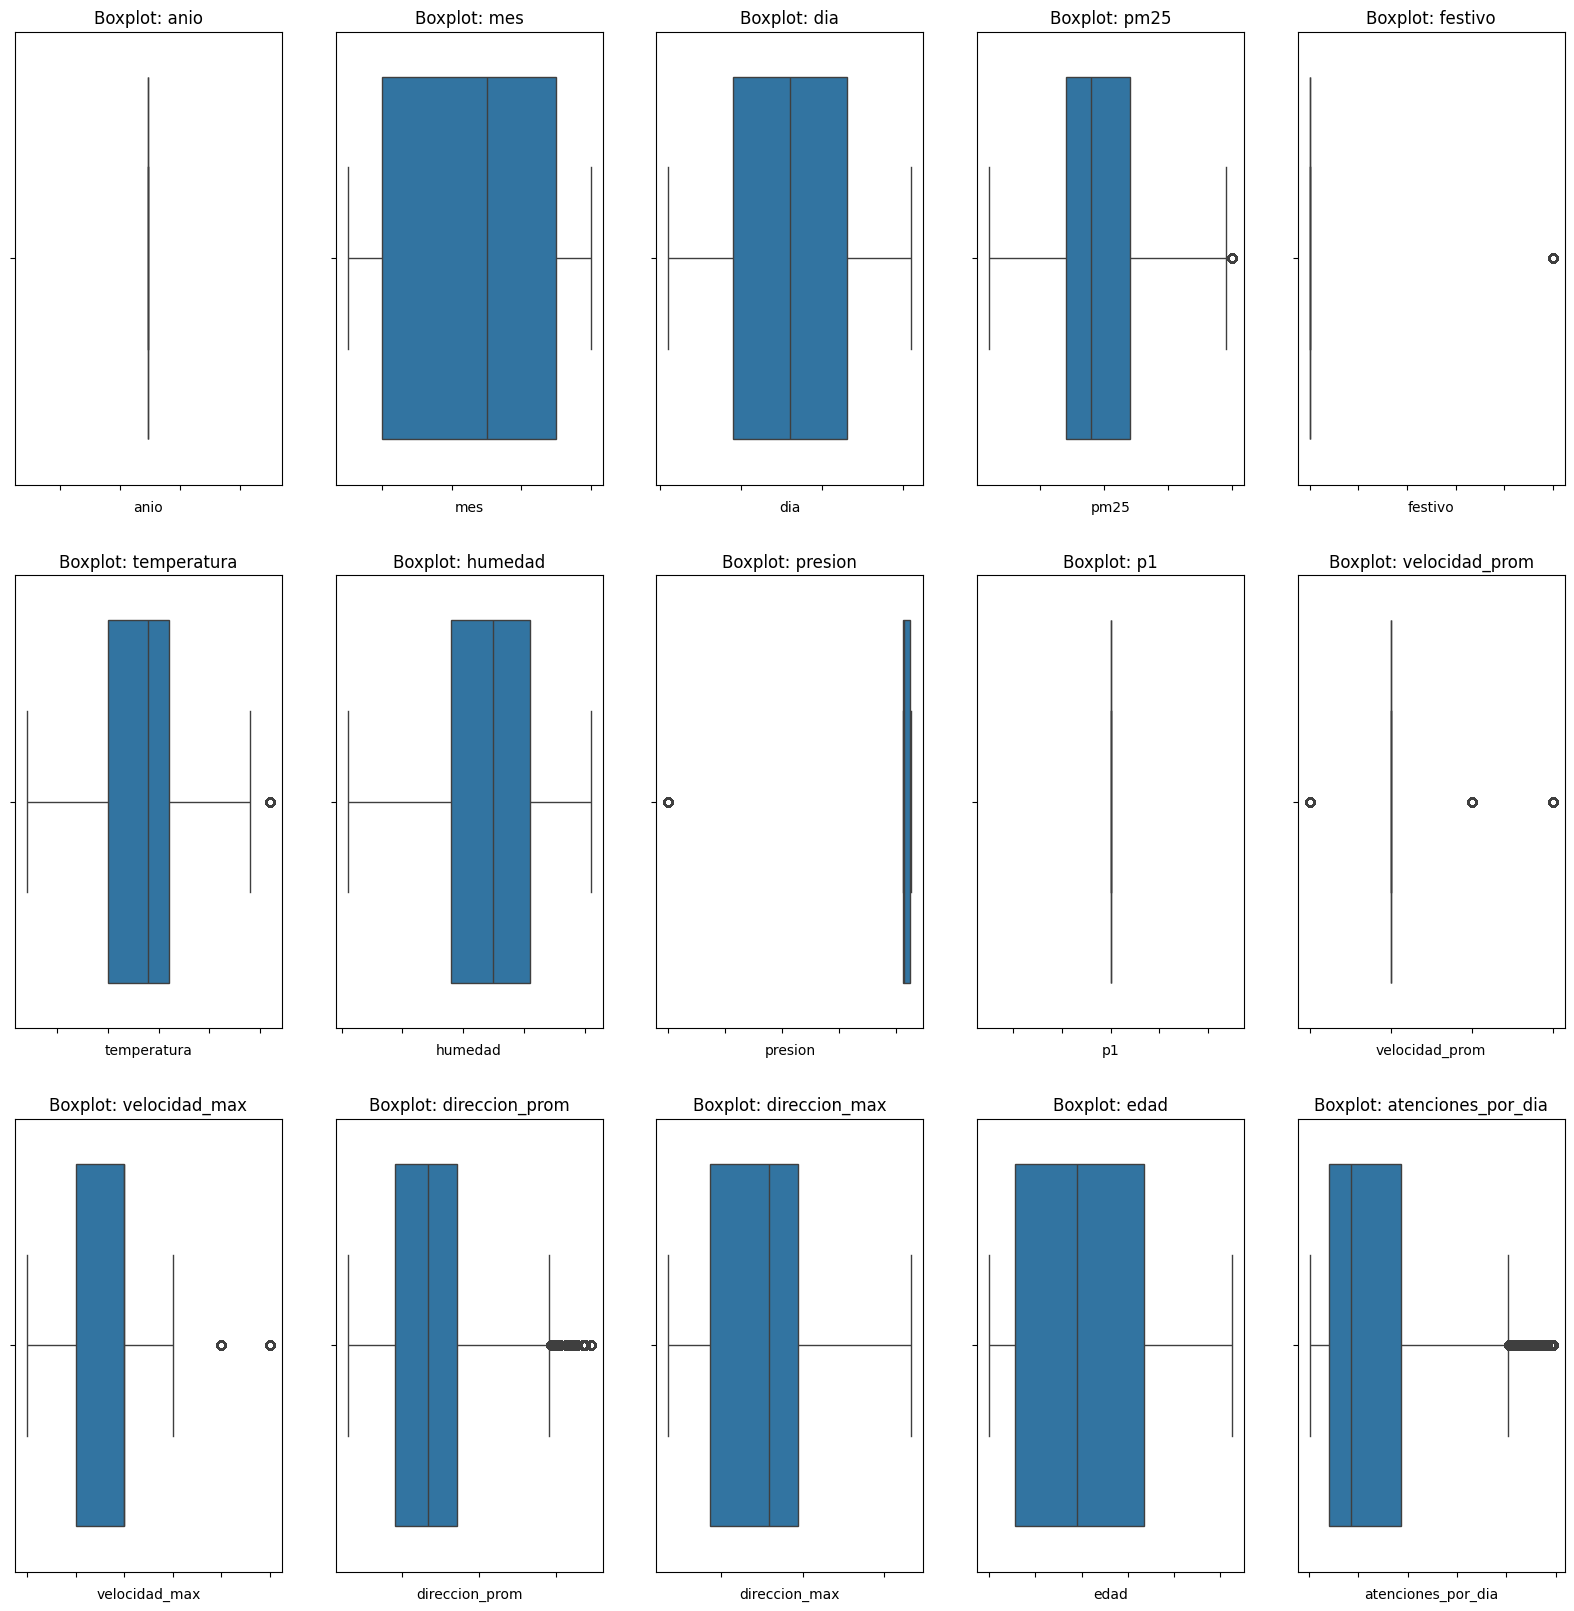

In [83]:
# Crear la figura y los subplots
fig, axes = plt.subplots(3, 5, figsize=(20,20))

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()
for i, col in enumerate(columnas):
    sns.boxplot(data=dataSetCompleto, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")
    axes[i].set_xticklabels([col], rotation=90)

Por los gráficos de boxplot podemos confirmar que los datos en la mayoria de variables tienden a establecer una cola inferior en las diferentes distribucioens de datos sesgando estas a los primeros cuantiles.